# Evaluation Project 2 Avacado Project
#### By: Heramb Gadgil

## Problem statement
#### Avocado is a fruit consumed by people heavily in the United States.

Content:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#### Some relevant columns in the dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

### Inspiration/Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single f
ile.

# Let's Start the project 

In [1]:
# importing necessary libraries
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Import csv file
df = pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])


No of Rows: 18249
No of Columns: 14


In [4]:
df.columns.to_list()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [5]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

# Stastical Analysis
##### Before Going for Statistical exploration of data, first check integrity of data & Missing value

### Data Integrity Check
##### Since dataset is large, Let check for any entry which is repeated or duplicated in dataset at same date.

In [7]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

0

##### Thus no duplicates are present in the dataset

### To check missing vlaues

<Axes: >

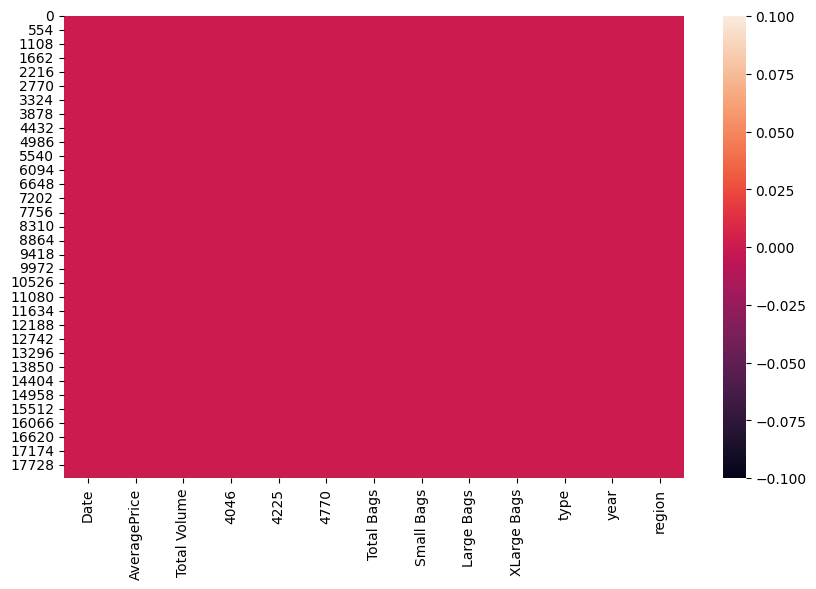

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

              Missing Values  % Missing data
Date                       0             0.0
AveragePrice               0             0.0
Total Volume               0             0.0
4046                       0             0.0
4225                       0             0.0
4770                       0             0.0
Total Bags                 0             0.0
Small Bags                 0             0.0
Large Bags                 0             0.0
XLarge Bags                0             0.0
type                       0             0.0
year                       0             0.0
region                     0             0.0


#### Observation:
- Thus we can conclude that there are no missing values.


### Datatype Check

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


#### Observation:
- There are 13 features in the data.
- Region has object  datatype
- Date by default datatype is object whick we need to change to datetime datatype.
- Other variable are float and int datattypes.


In [11]:
# Converting datatype of date column
df['Date']=pd.to_datetime(df.Date)

In [12]:
df['Date'].dtype

dtype('<M8[ns]')

## Stastical Matrix

<Axes: >

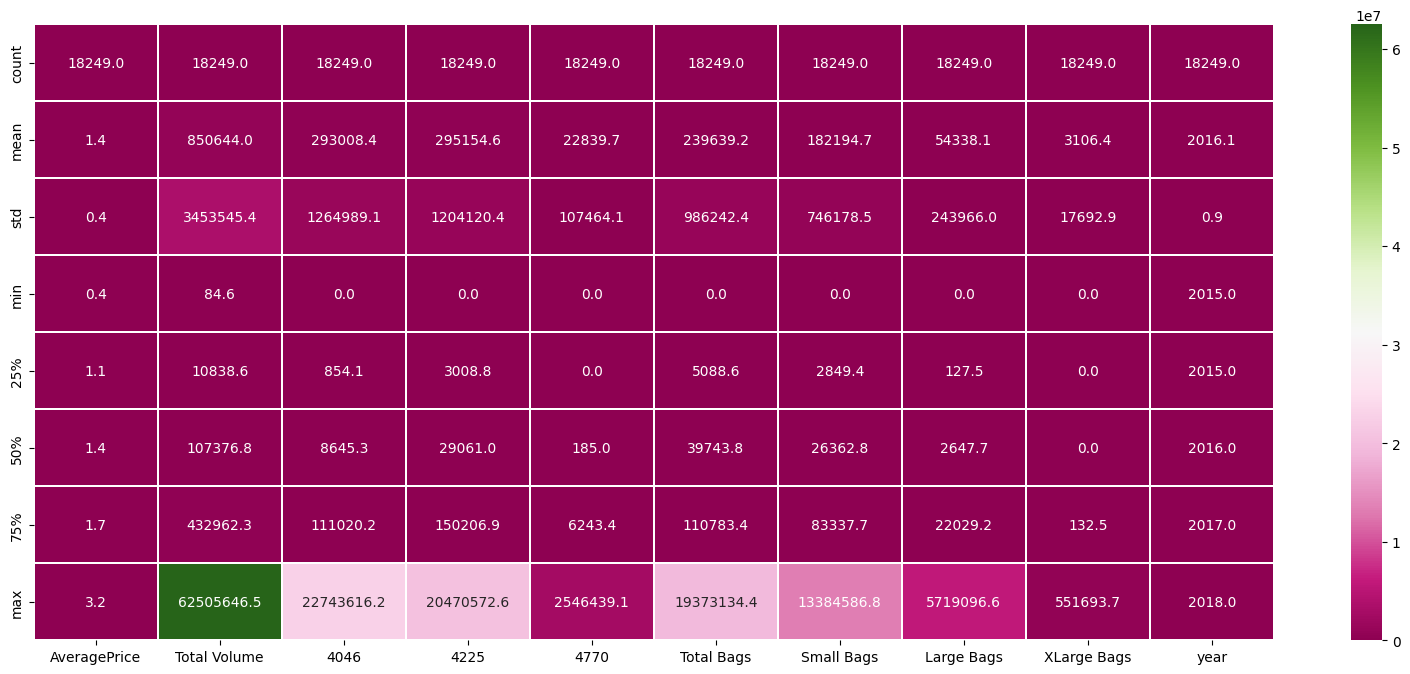

In [13]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(include=[np.number]),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [14]:
df.describe().T.round(3)

count                           mean                  min  \
Date            18249  2016-08-13 23:30:43.498273792  2015-01-04 00:00:00   
AveragePrice  18249.0                       1.405978                 0.44   
Total Volume  18249.0                  850644.013009                84.56   
4046          18249.0                  293008.424531                  0.0   
4225          18249.0                  295154.568356                  0.0   
4770          18249.0                   22839.735993                  0.0   
Total Bags    18249.0                   239639.20206                  0.0   
Small Bags    18249.0                  182194.686696                  0.0   
Large Bags    18249.0                   54338.088145                  0.0   
XLarge Bags   18249.0                    3106.426507                  0.0   
year          18249.0                    2016.147899               2015.0   

                              25%                  50%                  75%  \
Date          2015-10-25 00:00:00  2016-08-14 00:00:00  2017-06-04 00:00:00   
AveragePrice                  1.1                 1.37                 1.66   
Total Volume             10838.58            107376.76            432962.29   
4046                       854.07               8645.3             111020.2   
4225                      3008.78             29061.02            150206.86   
4770                          0.0               184.99              6243.42   
Total Bags                5088.64             39743.83            110783.37   
Small Bags                2849.42             26362.82             83337.67   
Large Bags                 127.47              2647.71             22029.25   
XLarge Bags                   0.0                  0.0                132.5   
year                       2015.0               2016.0               2017.0   

                              max             std  
Date          2018-03-25 00:00:00             NaN  
AveragePrice                 3.25        0.402677  
Total Volume          62505646.52  3453545.355399  
4046                  22743616.17  1264989.081763  
4225                  20470572.61  1204120.401135  
4770                   2546439.11   107464.068435  
Total Bags            19373134.37   986242.399216  
Small Bags             13384586.8   746178.514962  
Large Bags             5719096.61   243965.964547  
XLarge Bags             551693.65    17692.894652  
year                       2018.0        0.939938

#### Observations:
- We can easily suspect that some of the features contain outliers after looking at 50% and max columns.
- For most of columns have minimum value of zero.
- Almost in all columns value of mean is greater than median. Data is right skewed.
- For most of columns value of std. deviation is greater than mean i.e. data is spread.


##### Lets do some Statistical Analysis. Start with find Average price of avocodo over the timeframe and according types

In [15]:
print("\033[1m"+'Minimum Price of Avocado :'+"\033[0m",df.AveragePrice.min(),'USD')
print("\033[1m"+'Maximum Price of avacado :'+"\033[0m",df.AveragePrice.max(),'USD')
print("\033[1m"+'Average Price of avacado :'+"\033[0m",df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.405978409775878 USD


Avacado varies from 0.44 USD To 3.25 USD with average price of 1.40 USD per unit

<Axes: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

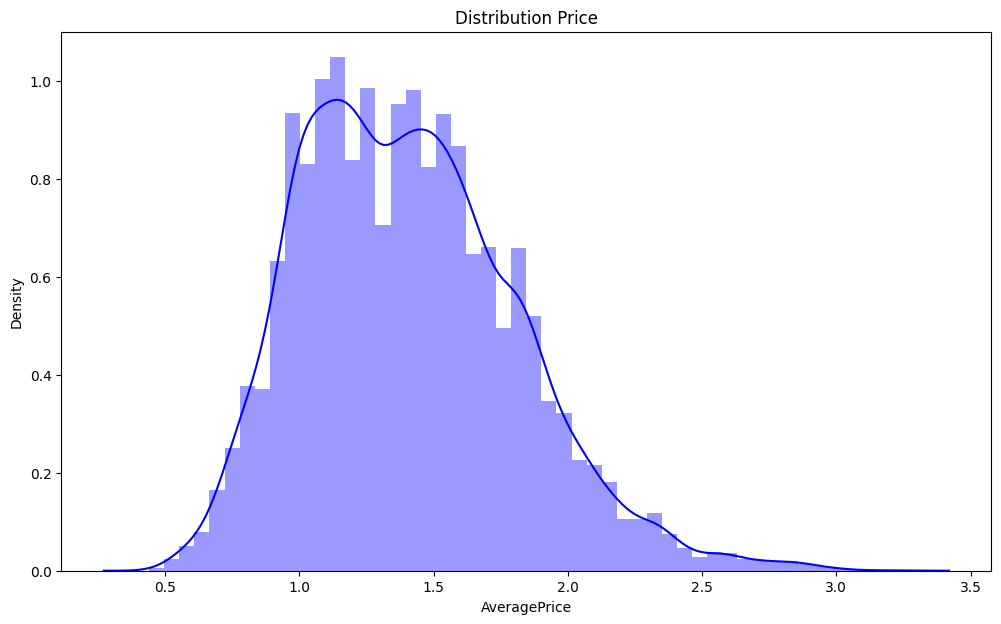

In [16]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='b')

Most of cases Average Price of Avacado varies between 1.1 and 1.6 USD/unit

In [17]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [18]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [19]:
print("\033[1m"+'Percentage difference in price of avacado :'+"\033[0m",((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of avacado : 42.831606217616596 %


<Axes: xlabel='AveragePrice', ylabel='type'>

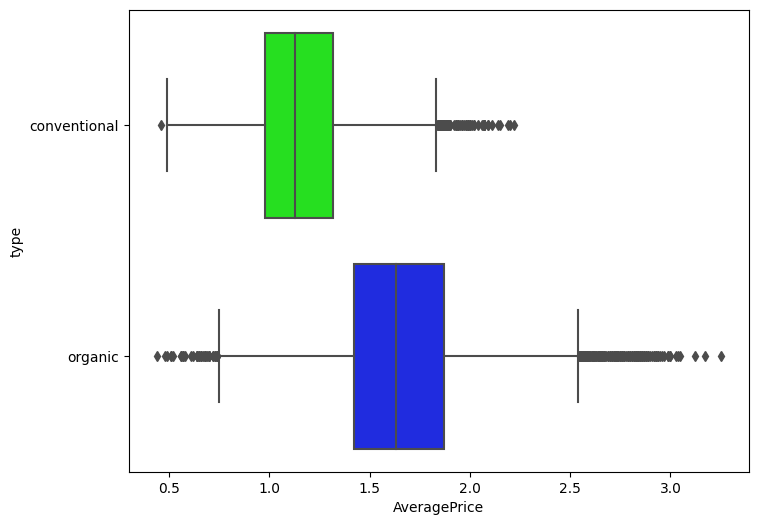

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

#### Observations:
- Oraganic Avocado is almost 43% more costlier than conventional Avacado.
- We can see that Average Price of Organic Avocado is higher than Conventional Avocado.
- This obvious as cultivation of organic avocado is expensive, time taking process demanding much effort & patience.Also health cautious and quality oriented people are willing to pay more price for it.

##### Before going deeper with Average price to gain more insight as it has lot more to explore, just let do quick check over volumetric sell of Avacado. Normal tendency of most people is they dont want to pay more price so most probably if such scenerio exist then it will be reflected in total sales.

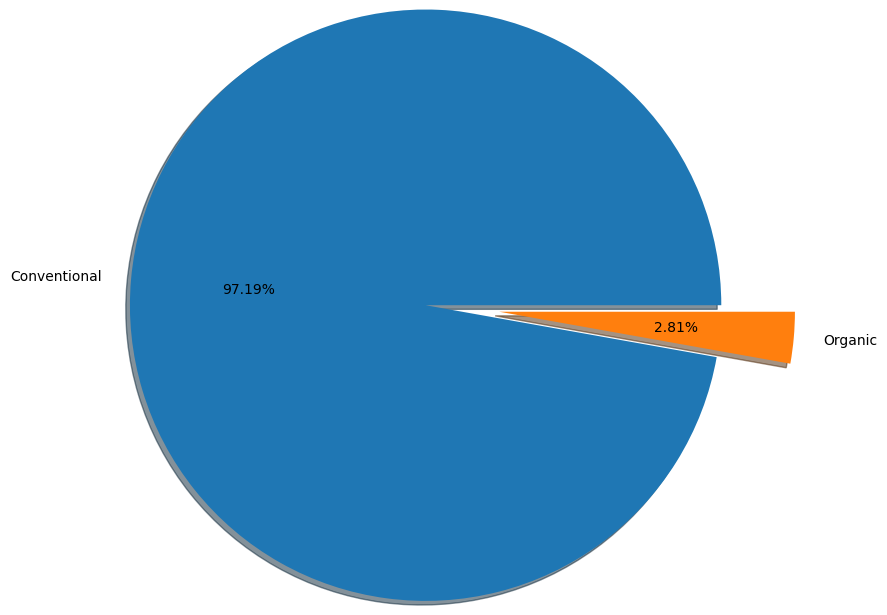

In [21]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(df.groupby('type')['Total Volume'].mean(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

In [22]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

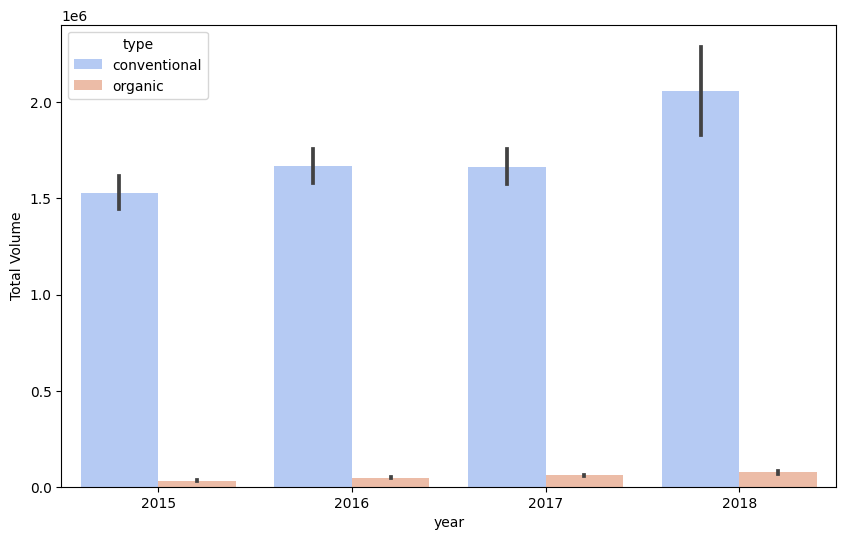

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

#### Observations:
- The sell of organic avacodo is less than 3 %.
- Conventional Avacado are in more demand.
- Barplot confirm same thing in yearwise sales volume.

##### The Average price varies over year and season , lets dive to get some more insight over it.

In [24]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True)

AveragePrice       0.44  0.46  0.48  0.49  0.51  0.52  0.53  0.54  0.55  0.56  \
type         year                                                               
conventional 2015     0     0     0     1     1     1     3     1     0     4   
             2016     0     0     0     0     1     0     0     3     2     4   
             2017     0     1     0     0     1     1     3     3     1     0   
             2018     0     0     0     0     0     0     0     0     0     2   
organic      2015     0     0     0     0     0     0     0     0     0     0   
             2016     0     0     0     0     0     0     0     0     0     0   
             2017     1     0     1     1     2     1     0     0     0     2   
             2018     0     0     0     0     0     0     0     0     0     0   
All                   1     1     1     2     5     3     6     7     3    12   

AveragePrice       ...  2.97  2.99  3.0  3.03  3.04  3.05  3.12  3.17  3.25  \
type         year  ...                                                        
conventional 2015  ...     0     0    0     0     0     0     0     0     0   
             2016  ...     0     0    0     0     0     0     0     0     0   
             2017  ...     0     0    0     0     0     0     0     0     0   
             2018  ...     0     0    0     0     0     0     0     0     0   
organic      2015  ...     0     0    0     0     0     0     0     0     0   
             2016  ...     0     1    0     1     0     0     1     0     1   
             2017  ...     1     1    2     0     1     1     0     1     0   
             2018  ...     0     0    0     0     0     0     0     0     0   
All                ...     1     2    2     1     1     1     1     1     1   

AveragePrice         All  
type         year         
conventional 2015   2808  
             2016   2808  
             2017   2862  
             2018    648  
organic      2015   2807  
             2016   2808  
             2017   2860  
             2018    648  
All                18249  

[9 rows x 260 columns]

In [25]:

df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

#### observation:
- Oraganic Avocado is 40-50% costlier than conventional avacado.
- Avacodo
- got price hike in year 2017 as result of some reason may be inflation,shortage, more wages.
- Except 2017 each year their is incresase in price of avacado.

#### Price hike over time, its okay !!!
But what about demand over timeframe ?, Lets check trend of demand through volume sell in next section.

In [26]:
df.groupby(['year','type'])[['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags']].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

#### Observation:
- Sales of Avacado in 2017 is more than 2016 so price hike is may be as result of increase in demand or some supply chain issue.
- sales in turn Demand is also increase over time.
- 30 % increase in sale of organic avocado in 2017 compare to 2016, even when it is almost 50% costlier than conventional type.
- There is also growth in demand of conventional type avocado year-wise but rate of growth of demand comparelative less than organic type. May be people becoming more health oriented.
- XLarge Bags sales increase rapidly in 2017 compare to 2015.
- If we look at trend from 2015 customer start buying buying Large or Xlarge bags compare to small bags in case of Conventional type. May be quantity & discount offer by shop may be playing role here.
- People choosing small bags of organic avocado over large.Price factor playing here.

In [27]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

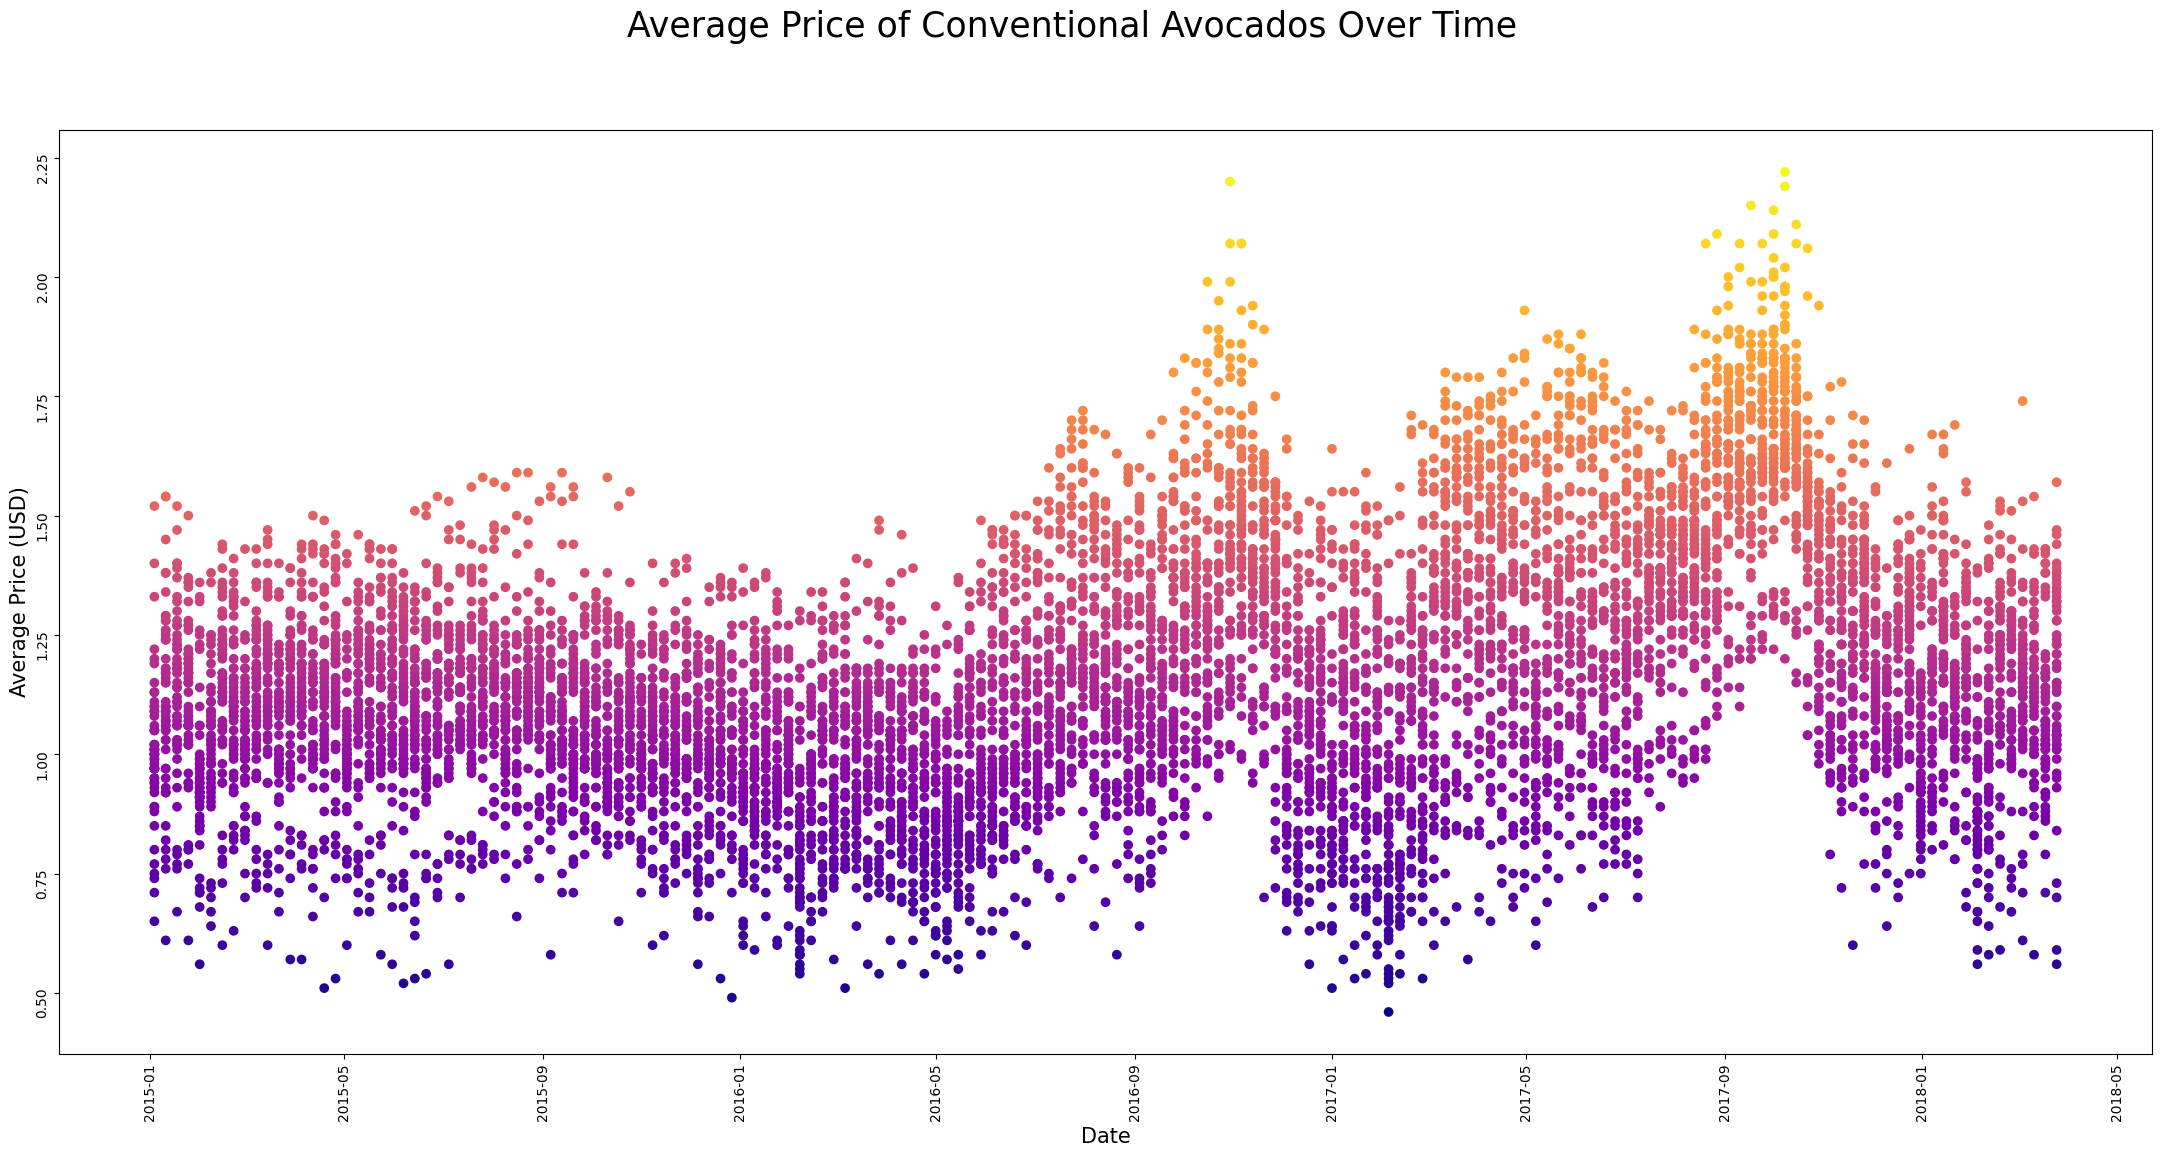

In [28]:
# Average price of Conventional Avocados over time

mask = df['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter( dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

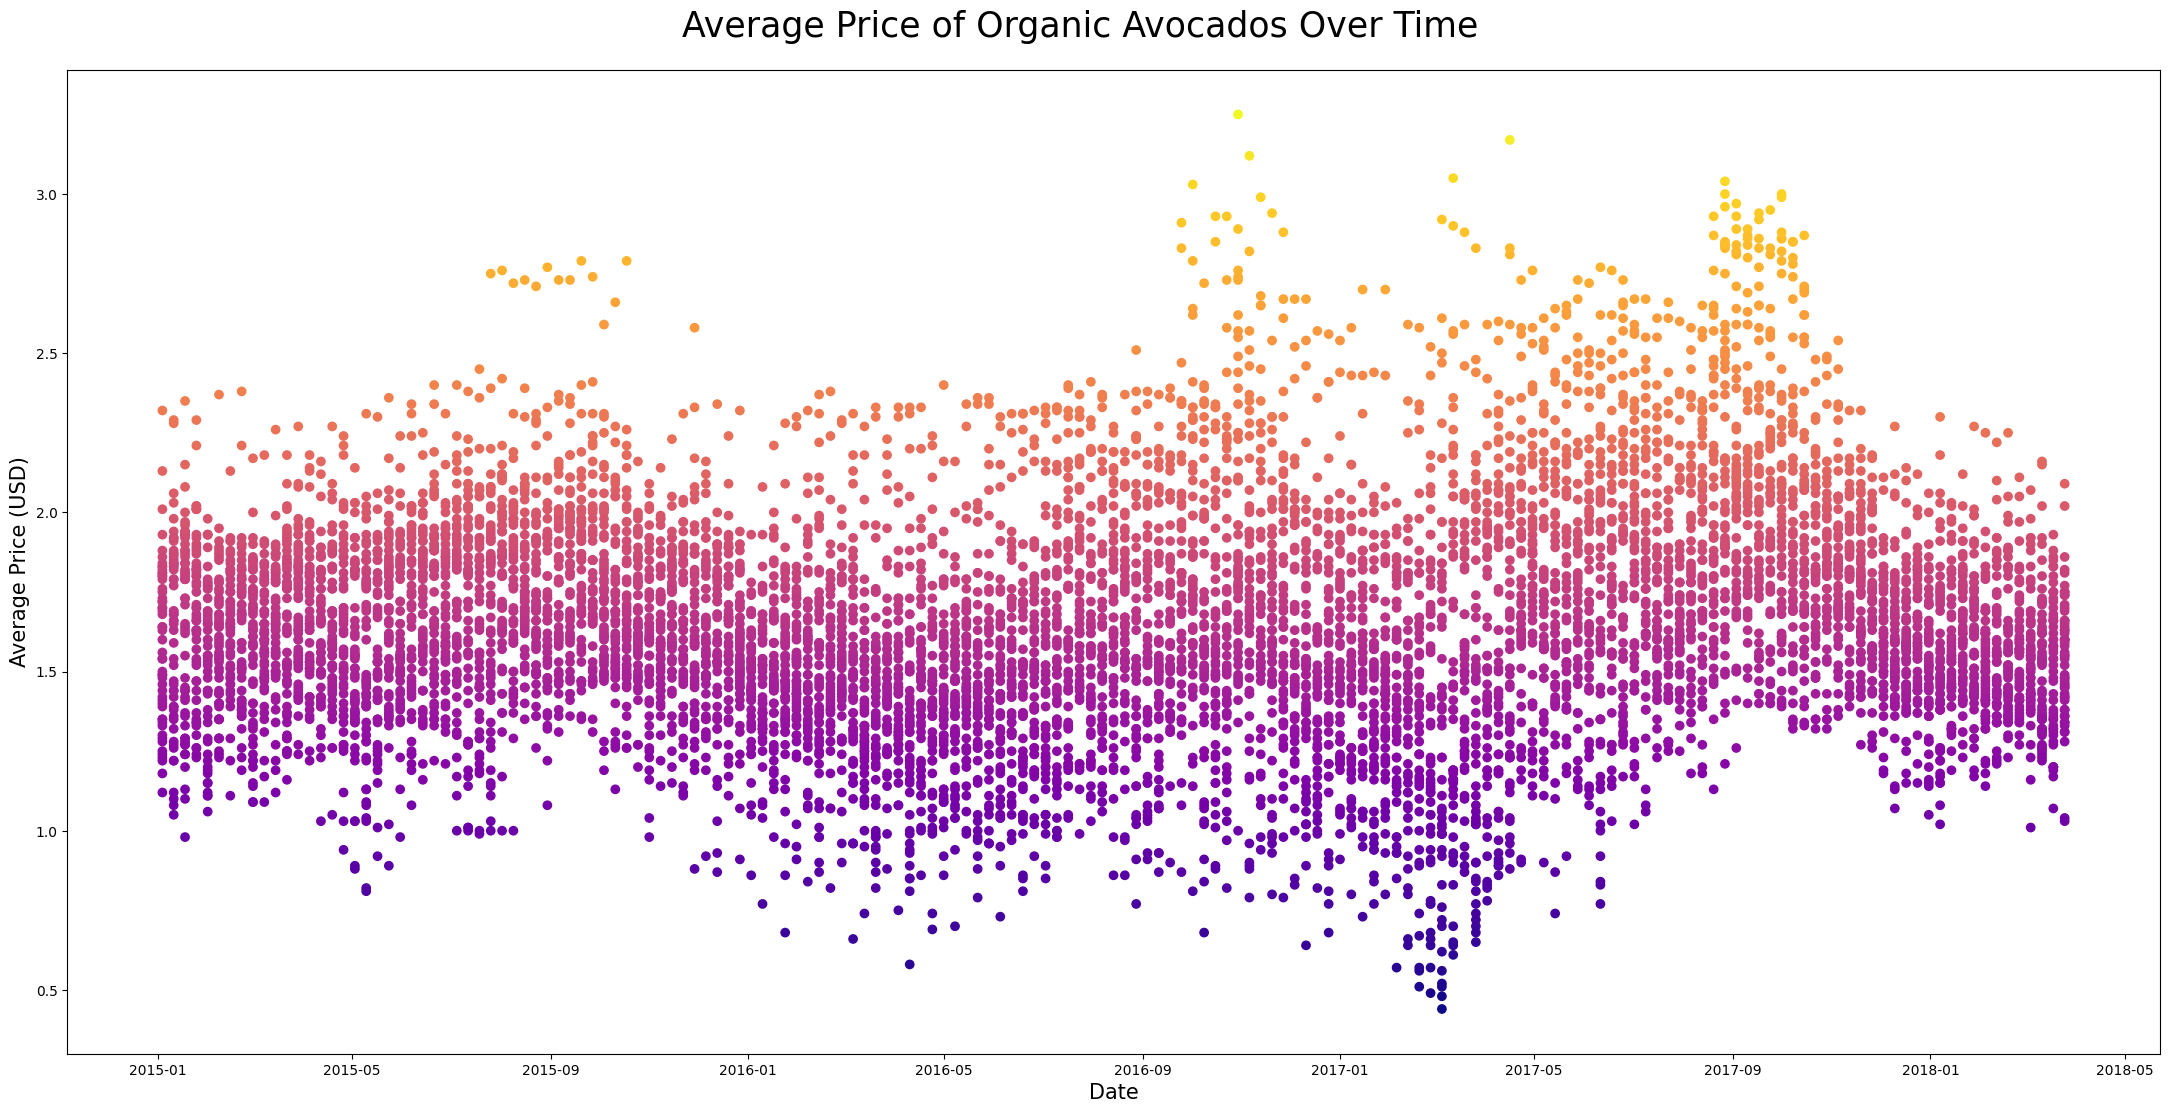

In [29]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.xlim()
plt.show()

In [31]:
df.groupby(['region'])[['Total Volume','AveragePrice']].agg([sum])

Total Volume AveragePrice
                              sum          sum
region                                        
Albany               1.606780e+07       527.63
Atlanta              8.860512e+07       452.23
BaltimoreWashington  1.347139e+08       518.57
Boise                1.441319e+07       455.67
Boston               9.727398e+07       517.44
BuffaloRochester     2.296247e+07       512.69
California           1.028982e+09       471.62
Charlotte            3.555554e+07       542.84
Chicago              1.337023e+08       526.19
CincinnatiDayton     4.452201e+07       408.71
Columbus             2.999336e+07       423.44
DallasFtWorth        2.084193e+08       366.93
Denver               1.389025e+08       411.88
Detroit              6.342242e+07       431.32
GrandRapids          3.021174e+07       508.69
GreatLakes           5.896425e+08       452.43
HarrisburgScranton   4.180886e+07       511.49
HartfordSpringfield  5.067054e+07       614.70
Houston              2.031679e+08       354.20
Indianapolis         3.026339e+07       444.13
Jacksonville         2.879000e+07       510.70
LasVegas             5.437691e+07       466.75
LosAngeles           5.078965e+08       411.01
Louisville           1.609700e+07       434.90
MiamiFtLauderdale    9.767322e+07       482.83
Midsouth             5.083494e+08       474.81
Nashville            3.561209e+07       409.69
NewOrleansMobile     4.569514e+07       441.02
NewYork              2.407341e+08       583.92
Northeast            7.132809e+08       541.45
NorthernNewEngland   7.153289e+07       499.36
Orlando              5.866070e+07       509.10
Philadelphia         7.183880e+07       551.66
PhoenixTucson        1.956433e+08       413.86
Pittsburgh           1.880635e+07       461.14
Plains               3.111885e+08       485.54
Portland             1.105522e+08       445.39
RaleighGreensboro    4.820273e+07       525.63
RichmondNorfolk      4.223085e+07       436.47
Roanoke              2.504201e+07       421.80
Sacramento           7.516375e+07       548.09
SanDiego             8.979192e+07       472.58
SanFrancisco         1.358302e+08       609.82
Seattle              1.092142e+08       487.59
SouthCarolina        6.075377e+07       474.31
SouthCentral         1.011280e+09       372.22
Southeast            6.152384e+08       472.53
Spokane              1.556528e+07       488.61
StLouis              3.207283e+07       483.55
Syracuse             1.094267e+07       513.87
Tampa                6.600454e+07       476.19
TotalUS              5.864740e+09       445.83
West                 1.086779e+09       430.01
WestTexNewMexico     1.445218e+08       422.67

# EDA

In [32]:
df.head()

Date  AveragePrice  Total Volume     4046      4225     4770  \
11569 2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
9593  2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
10009 2015-01-04          1.68       2896.72   161.68    206.96     0.00   
1819  2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
9333  2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
11569    13598.46    13061.10      537.36          0.0       organic  2015   
9593       905.55      905.55        0.00          0.0       organic  2015   
10009     2528.08     2528.08        0.00          0.0       organic  2015   
1819     14925.18    11264.80     3660.38          0.0  conventional  2015   
9333       374.35      186.67      187.68          0.0       organic  2015   

                   region  
11569           Southeast  
9593              Chicago  
10009  HarrisburgScranton  
1819           Pittsburgh  
9333                Boise

In [33]:
df2=df.copy()

In [34]:
# Creating Datframe for numeric features
df2.drop(['Date','type','region','year'], axis=1, inplace=True)

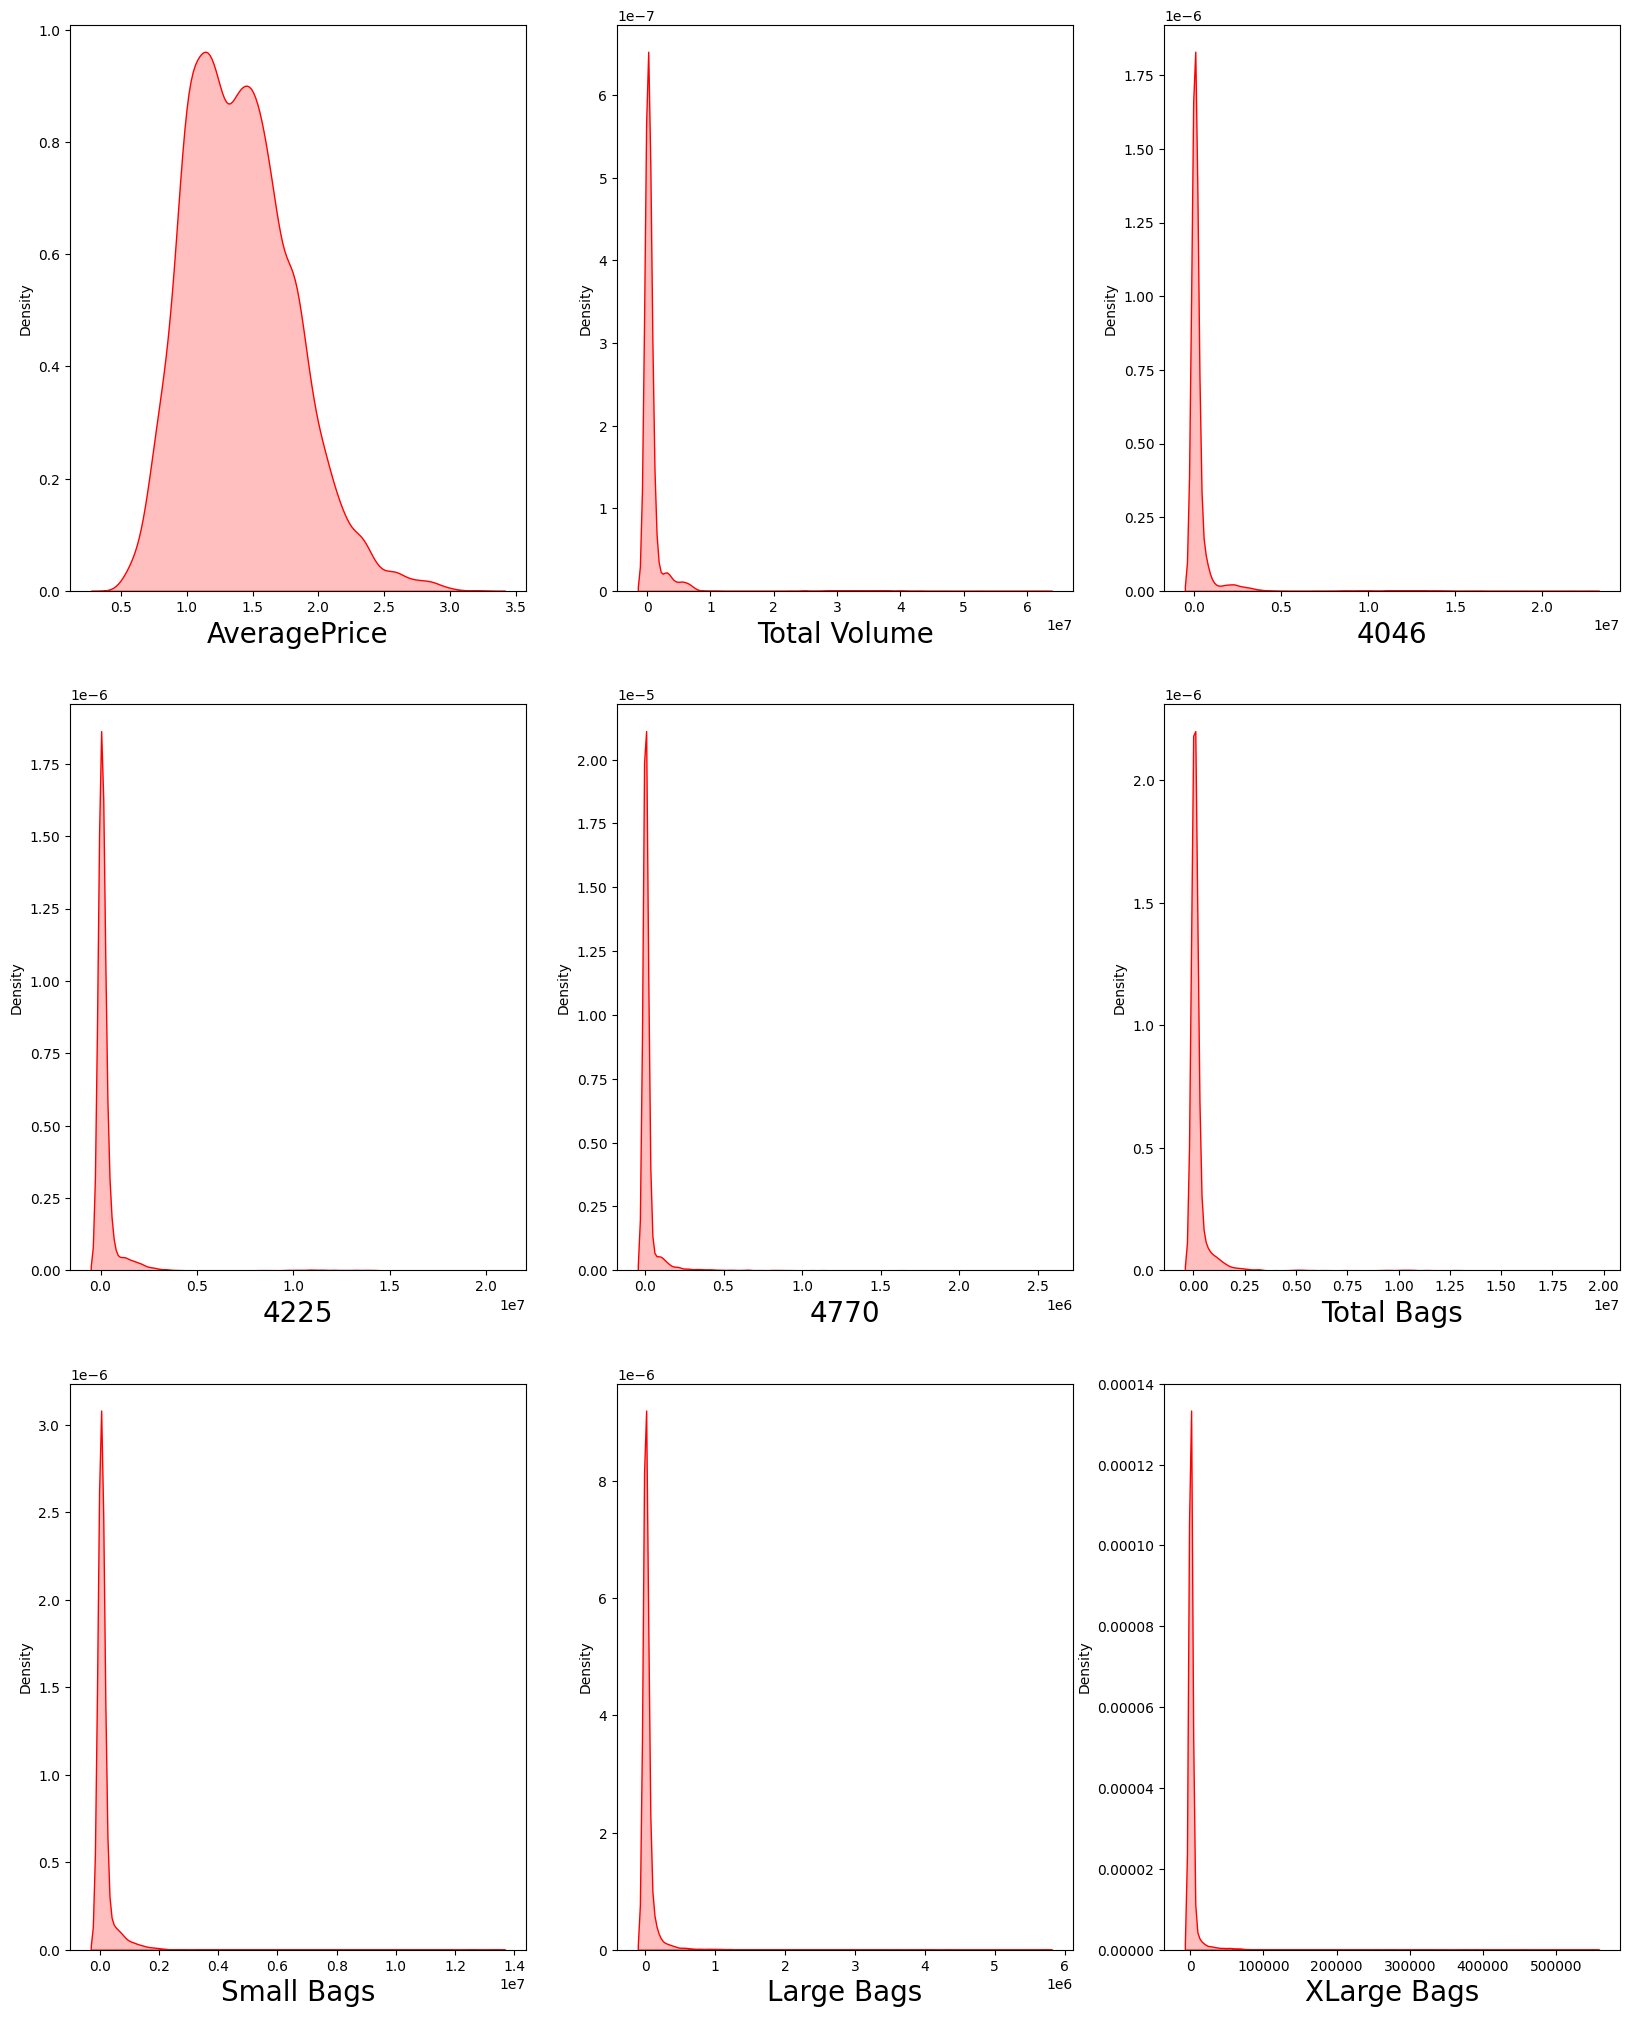

In [35]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Observations:
- We can see skewed data with presence of outliers with sharp peak.
- Most of the plots are right skewed, having value of mean very small compare to std. deviation & median. This is resulting in sharp high peak.Very few data points are present as we move away from zero to other end of x-axis.

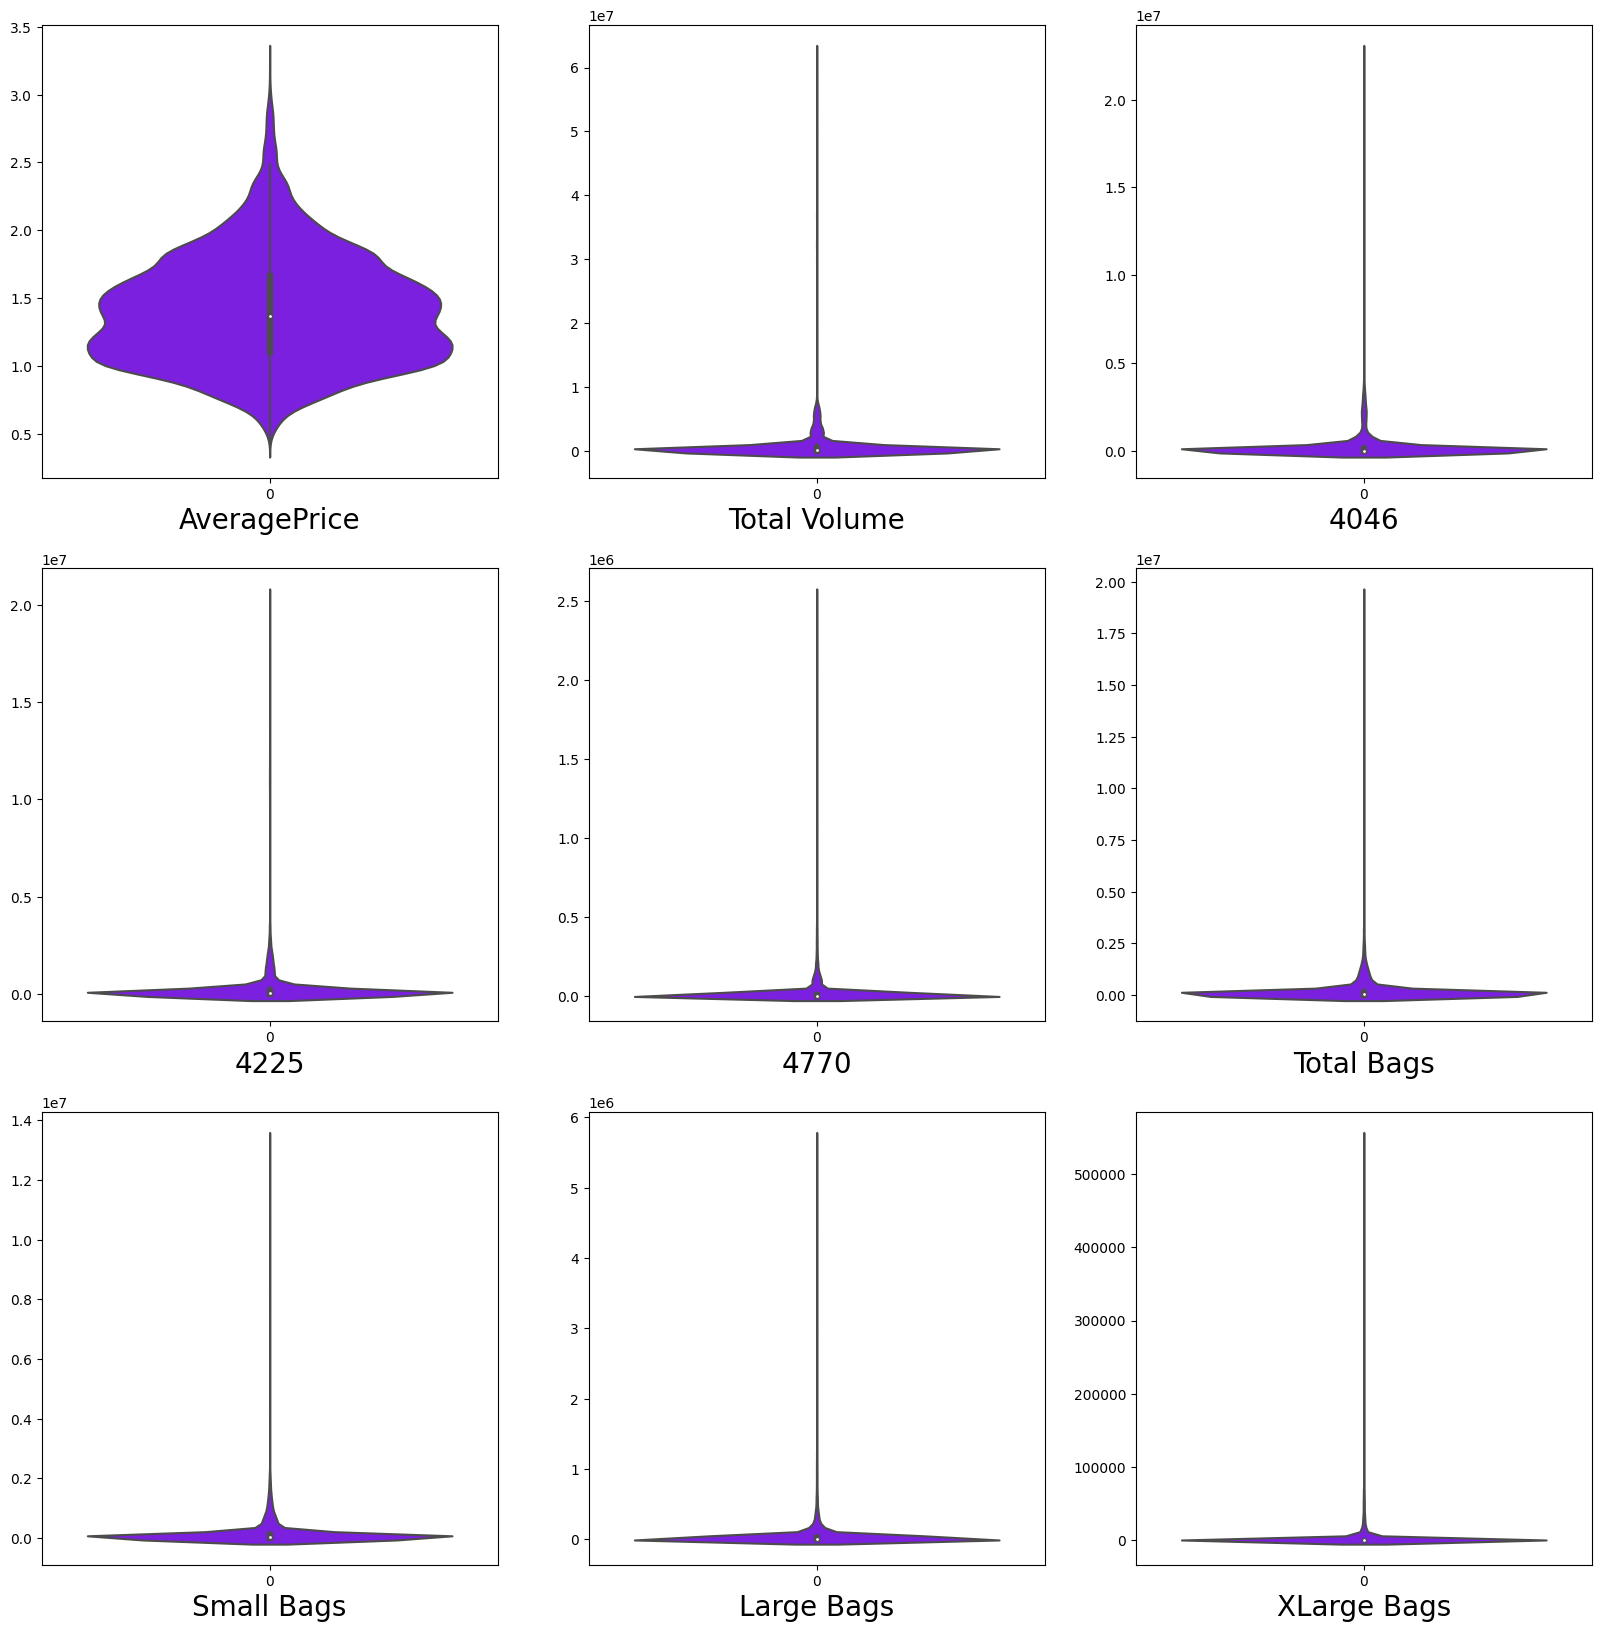

In [36]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

#### Observation:
- For Majority Average price is in range of 1 to 1.5.
- Rest of Violin plot show same story as distribution plot.

#### Avacado availability and price also vary over the year according to seasonal changes.Lets check the variation Avg price and sales volume over each month.

    For that purpose let create another copy dataframe and then split date column into Year,Month and Day.


In [79]:
# Import csv file
df = pd.read_csv('avocado.csv')

In [80]:
# Copy of original dataframe
df3=df.copy()
df3.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [81]:
df3['Month'] = pd.to_datetime(df3['Date']).dt.month

In [82]:
df3.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  Month  
0  2015  Albany     12  
1  2015  Albany     12  
2  2015  Albany     12  
3  2015  Albany     12  
4  2015  Albany     11

In [83]:
# Converting Datetime datatypes to int
df3['Year']=df3['year'].astype(int)
df3['Month']=df3['Month'].astype(int)
df3.drop(columns=["year"],axis=1,inplace=True)
df3.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   region  Month  Year  
0  Albany     12  2015  
1  Albany     12  2015  
2  Albany     12  2015  
3  Albany     12  2015  
4  Albany     11  2015

In [87]:
df3.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [88]:
df3.drop(columns=["Date"],axis=1,inplace=True)
df3.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  Month  Year  
0     8603.62       93.25          0.0  conventional  Albany     12  2015  
1     9408.07       97.49          0.0  conventional  Albany     12  2015  
2     8042.21      103.14          0.0  conventional  Albany     12  2015  
3     5677.40      133.76          0.0  conventional  Albany     12  2015  
4     5986.26      197.69          0.0  conventional  Albany     11  2015

## Univariate analysis of feature using date, months, year

In [89]:
# Checking unique values and Yearwise total No of sale entry
df3['Year'].value_counts()

Year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

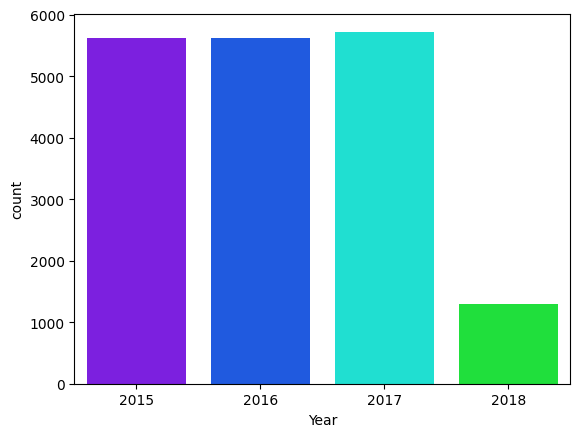

In [91]:
sns.countplot(x='Year',data=df3)

#### Observation:
- This dataset contain data from 2015 to 2018
- Maximum sales entry belongs to year 2017 while very few sales entry comes from 2018.


### Approach:
- We want check Avg Price over each Month
- First we will check Sale entries per Months
- Next We will Avg Price over each month using Countplot
- Finally we will try to bring insight over relation of sales entries to Avg price over same month.

## Checking Month-Wise sales entries

<Axes: xlabel='Month', ylabel='count'>

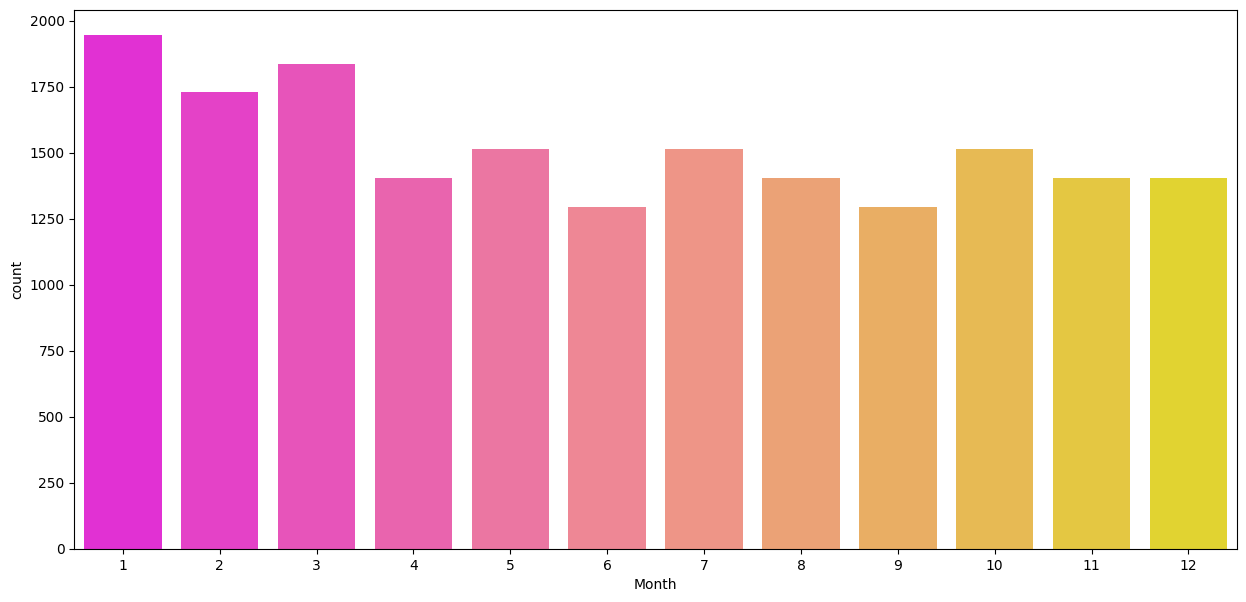

In [92]:
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=df3, palette="spring")

In [93]:
df3['Month'].value_counts().max()

1944

In [94]:
df3['Month'].value_counts().min()

1294

#### Observation:
- Maximum sales lead comes in month of Jan, Feb, March
- Maximum sales demand of Avacodo is in month of Jan (1944 lead) & Minimum sales demand of Avacoda is in month of June

## Checking Month-Wise Variation in Average Price


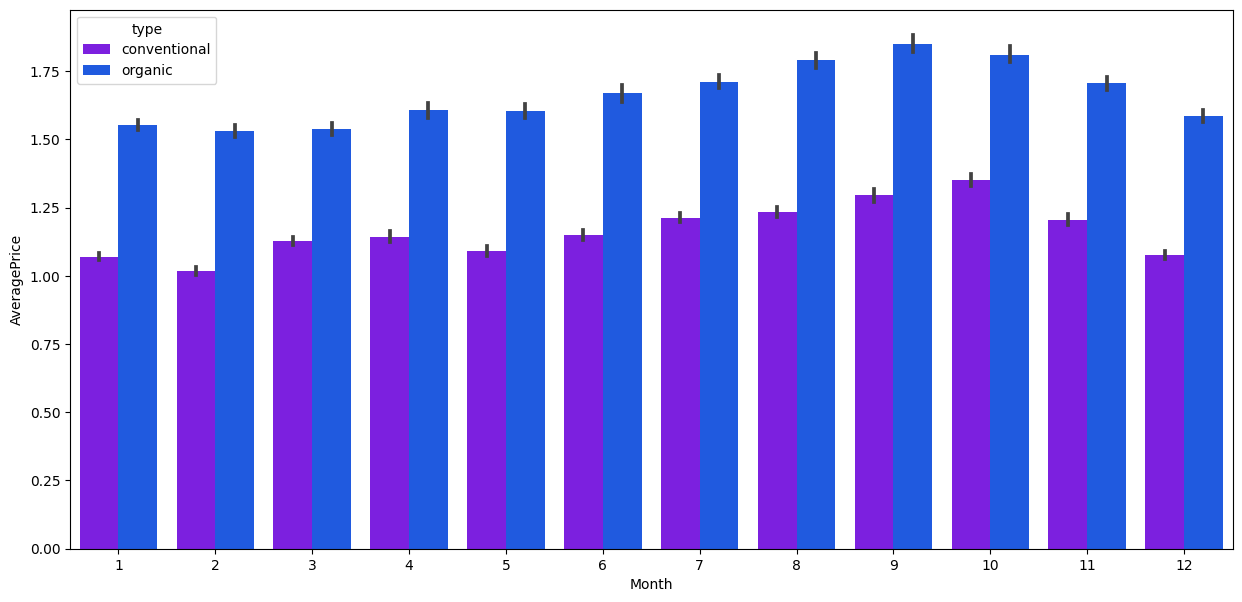

In [95]:
plt.figure(figsize=(15,7))
sns.barplot(x="Month", y="AveragePrice", hue='type', data=df3)
plt.show()


In [96]:
df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month           1                      2                      3             \
type  conventional   organic conventional   organic conventional   organic   
mean      1.069095  1.552942     1.017315  1.531458     1.126209  1.538301   

Month           4                     5             ...           8            \
type  conventional  organic conventional   organic  ... conventional  organic   
mean       1.14235  1.60641     1.089577  1.603624  ...     1.235399  1.78963   

Month           9                      10                     11            \
type  conventional   organic conventional   organic conventional   organic   
mean      1.294738  1.850571     1.349339  1.810026     1.206054  1.705071   

Month           12            
type  conventional   organic  
mean      1.077393  1.585193  

[1 rows x 24 columns]

#### observation:
- In month of September and October Price of Conventional type of Avacado is comparatively higher than other months.
- We can see that variation in mean price values in above groupby table, which confirm what we got from barplot.

#### But what causes such High demand in 1st quater of year ?
Simple Google gives answer 'FLAVOR'. Yes, Flavor!!!

Avocados are available year round like most agricultural commodities these days, but January through March is the best time of year for flavor . It is during this time that the fruit has developed higher oil content, resulting in that buttery flavor and texture that we all love.

- Now Let Compare Countplot of Sales Entries and Barplot of Avg Price Monthwise.
- In first sight we can see in period of Augest to October price high & in that same time period sales order are minimum.
- Opposite of it true in duration of Jan to March.
- This variation applicable to conventional type while we cannot find such any relation in case of Organic avacado.

#### In conclusion when Average sale price of 'Conventional Avacado' is high in same time less sales order are observe. Inshort Customer are less interested in buying avacado at high Price.

### Till Now we have not explore region feature , Now is time do it.

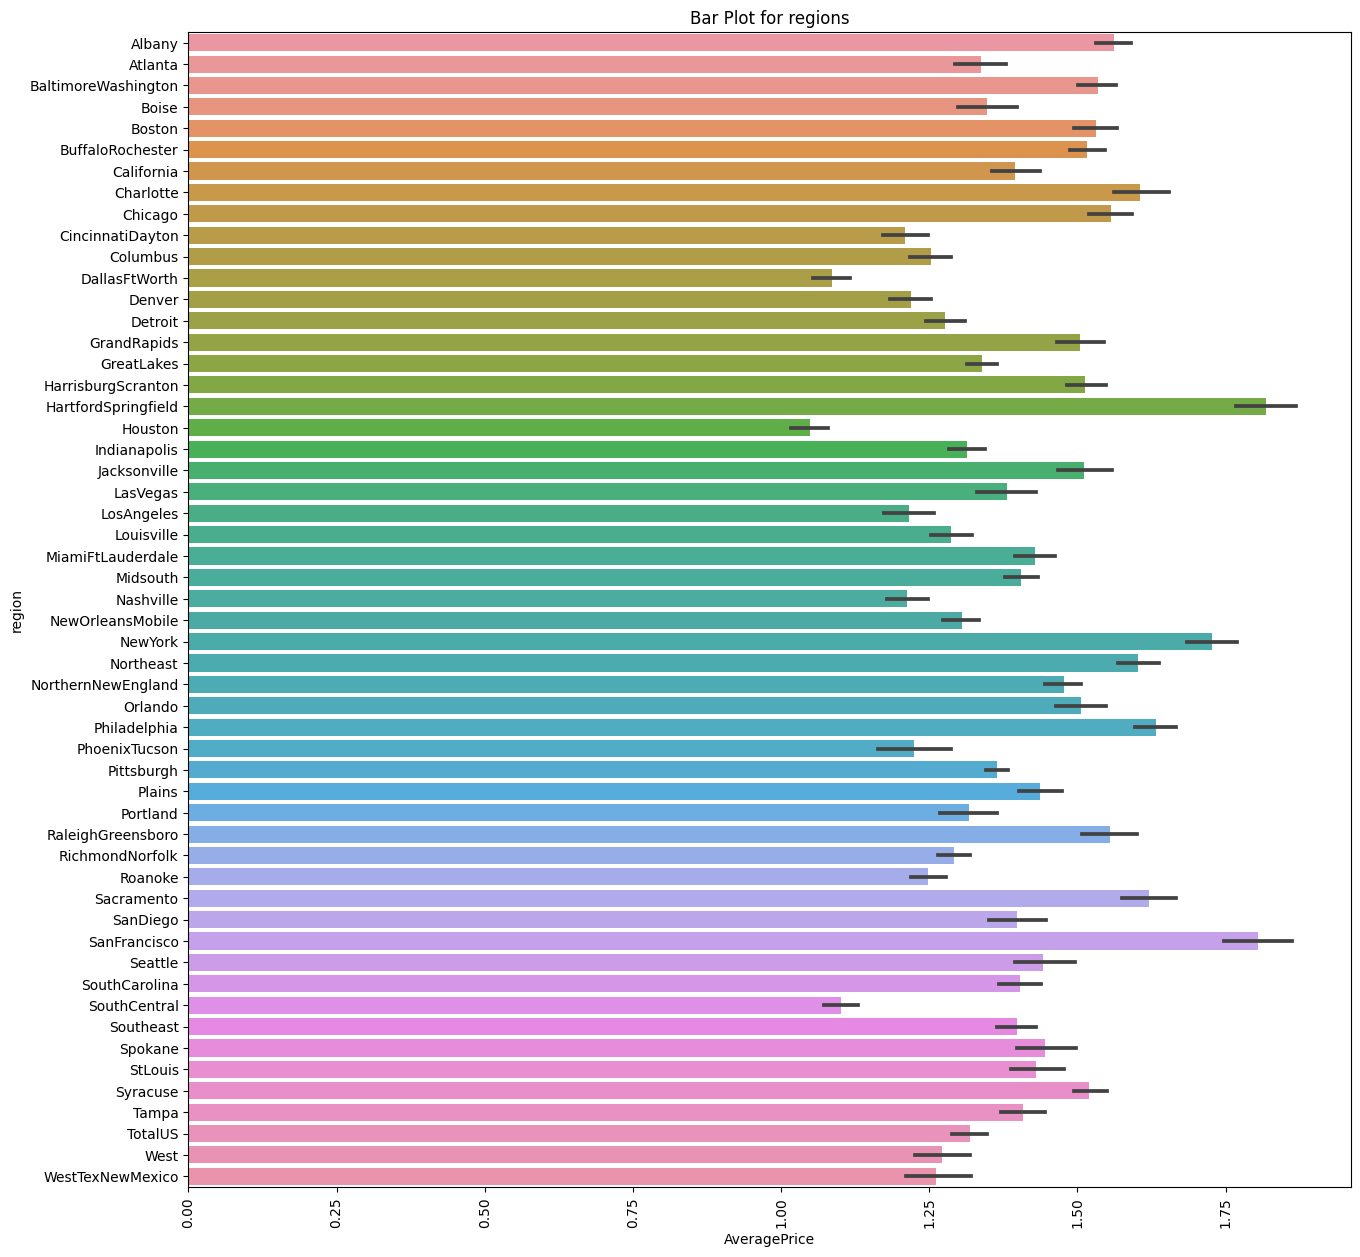

In [104]:
plt.figure(figsize=(15,15))
sns.barplot(y=df['region'],x=df['AveragePrice'], data=df3)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

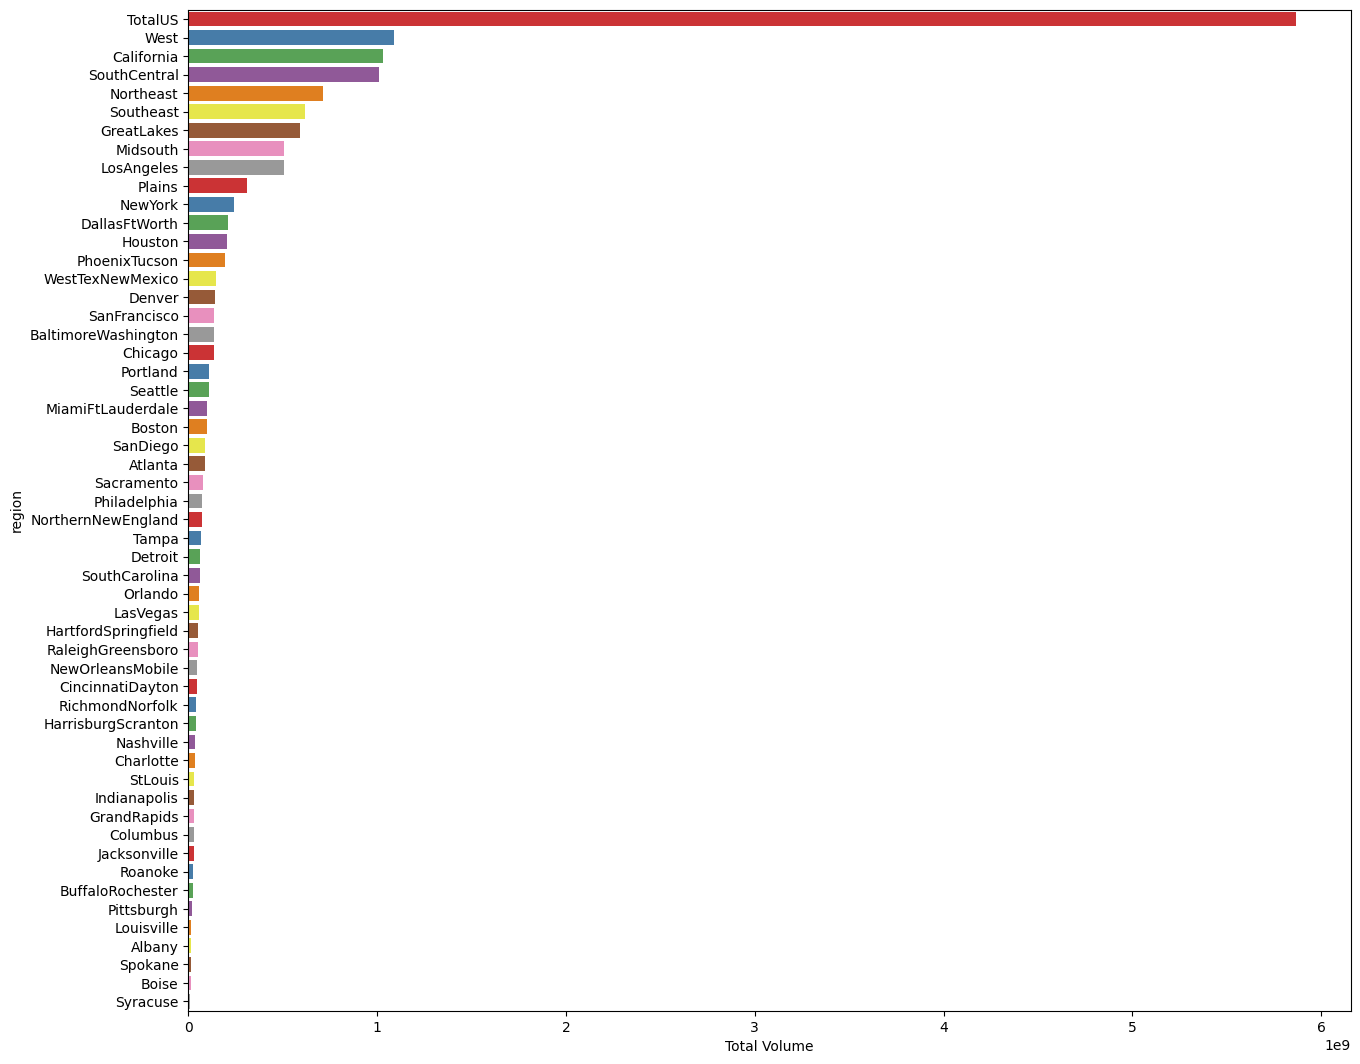

In [105]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

In [107]:
df.groupby(['region'])[['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags']].agg([np.mean])

Total Volume    Total Bags    Small Bags    Large Bags  \
                             mean          mean          mean          mean   
region                                                                        
Albany               4.753787e+04  7.929747e+03  6.647765e+03  1.153496e+03   
Atlanta              2.621453e+05  8.449856e+04  5.160573e+04  3.207004e+04   
BaltimoreWashington  3.985619e+05  1.044561e+05  1.009397e+05  2.903985e+03   
Boise                4.264257e+04  1.597459e+04  1.384004e+04  2.103634e+03   
Boston               2.877929e+05  6.359609e+04  5.890659e+04  4.438365e+03   
BuffaloRochester     6.793630e+04  3.435134e+04  3.037998e+04  3.729050e+03   
California           3.044324e+06  7.298290e+05  6.778038e+05  3.642585e+04   
Charlotte            1.051939e+05  3.460930e+04  3.149069e+04  2.912684e+03   
Chicago              3.955690e+05  4.989763e+04  4.377116e+04  5.005547e+03   
CincinnatiDayton     1.317219e+05  6.182816e+04  1.675117e+04  4.429643e+04   
Columbus             8.873776e+04  2.963428e+04  2.387808e+04  5.103195e+03   
DallasFtWorth        6.166251e+05  1.374845e+05  1.207744e+05  1.543113e+04   
Denver               4.109542e+05  1.744290e+05  5.551362e+04  1.187601e+05   
Detroit              1.876403e+05  7.177534e+04  5.899134e+04  7.905232e+03   
GrandRapids          8.938383e+04  2.712750e+04  2.228839e+04  2.357398e+03   
GreatLakes           1.744505e+06  5.283303e+05  3.647559e+05  1.446617e+05   
HarrisburgScranton   1.236948e+05  4.002738e+04  3.778956e+04  1.780372e+03   
HartfordSpringfield  1.499128e+05  3.352962e+04  3.188923e+04  1.410794e+03   
Houston              6.010884e+05  1.485653e+05  9.622831e+04  5.137208e+04   
Indianapolis         8.953666e+04  3.544618e+04  1.955936e+04  1.504810e+04   
Jacksonville         8.517753e+04  2.875186e+04  1.283961e+04  1.560060e+04   
LasVegas             1.608784e+05  5.341122e+04  2.656102e+04  2.680271e+04   
LosAngeles           1.502653e+06  4.978240e+05  4.607281e+05  2.503889e+04   
Louisville           4.762427e+04  1.963103e+04  8.326157e+03  1.098558e+04   
MiamiFtLauderdale    2.889740e+05  6.957527e+04  3.319519e+04  3.547577e+04   
Midsouth             1.503992e+06  4.630581e+05  3.975279e+05  6.145227e+04   
Nashville            1.053612e+05  3.836440e+04  2.971239e+04  8.322173e+03   
NewOrleansMobile     1.351927e+05  4.221580e+04  3.508744e+04  5.611536e+03   
NewYork              7.122311e+05  2.011661e+05  1.727860e+05  2.731656e+04   
Northeast            2.110299e+06  5.828059e+05  5.136774e+05  6.525460e+04   
NorthernNewEngland   2.116358e+05  4.113913e+04  3.336382e+04  7.447946e+03   
Orlando              1.735524e+05  4.988651e+04  2.641384e+04  2.275300e+04   
Philadelphia         2.125408e+05  7.063678e+04  6.336398e+04  6.958744e+03   
PhoenixTucson        5.788264e+05  1.151131e+05  6.589535e+04  4.875947e+04   
Pittsburgh           5.564008e+04  2.143628e+04  1.600053e+04  5.265377e+03   
Plains               9.206761e+05  2.303172e+05  2.034338e+05  2.359066e+04   
Portland             3.270775e+05  1.464626e+05  1.228066e+05  2.342522e+04   
RaleighGreensboro    1.426116e+05  4.638070e+04  4.449847e+04  1.601024e+03   
RichmondNorfolk      1.249433e+05  3.700659e+04  3.448670e+04  2.153671e+03   
Roanoke              7.408879e+04  2.837570e+04  2.501876e+04  3.121787e+03   
Sacramento           2.223779e+05  2.657476e+04  2.573030e+04  2.269676e+02   
SanDiego             2.656566e+05  6.906115e+04  5.998754e+04  8.644449e+03   
SanFrancisco         4.018645e+05  4.405599e+04  4.290636e+04  5.234889e+02   
Seattle              3.231189e+05  1.499746e+05  1.255833e+05  2.418919e+04   
SouthCarolina        1.797449e+05  5.370761e+04  3.968446e+04  1.335283e+04   
SouthCentral         2.991952e+06  6.905102e+05  5.467914e+05  1.359078e+05   
Southeast            1.820232e+06  5.370640e+05  3.162819e+05  2.133361e+05   
Spokane              4.605111e+04  1.850407e+04  1.588258e+04  2.600242

#### Observation on feature Region:
- Maximum sales Volume is in South Central While Minimum Sales Volume is in Syracuse.
- Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston.

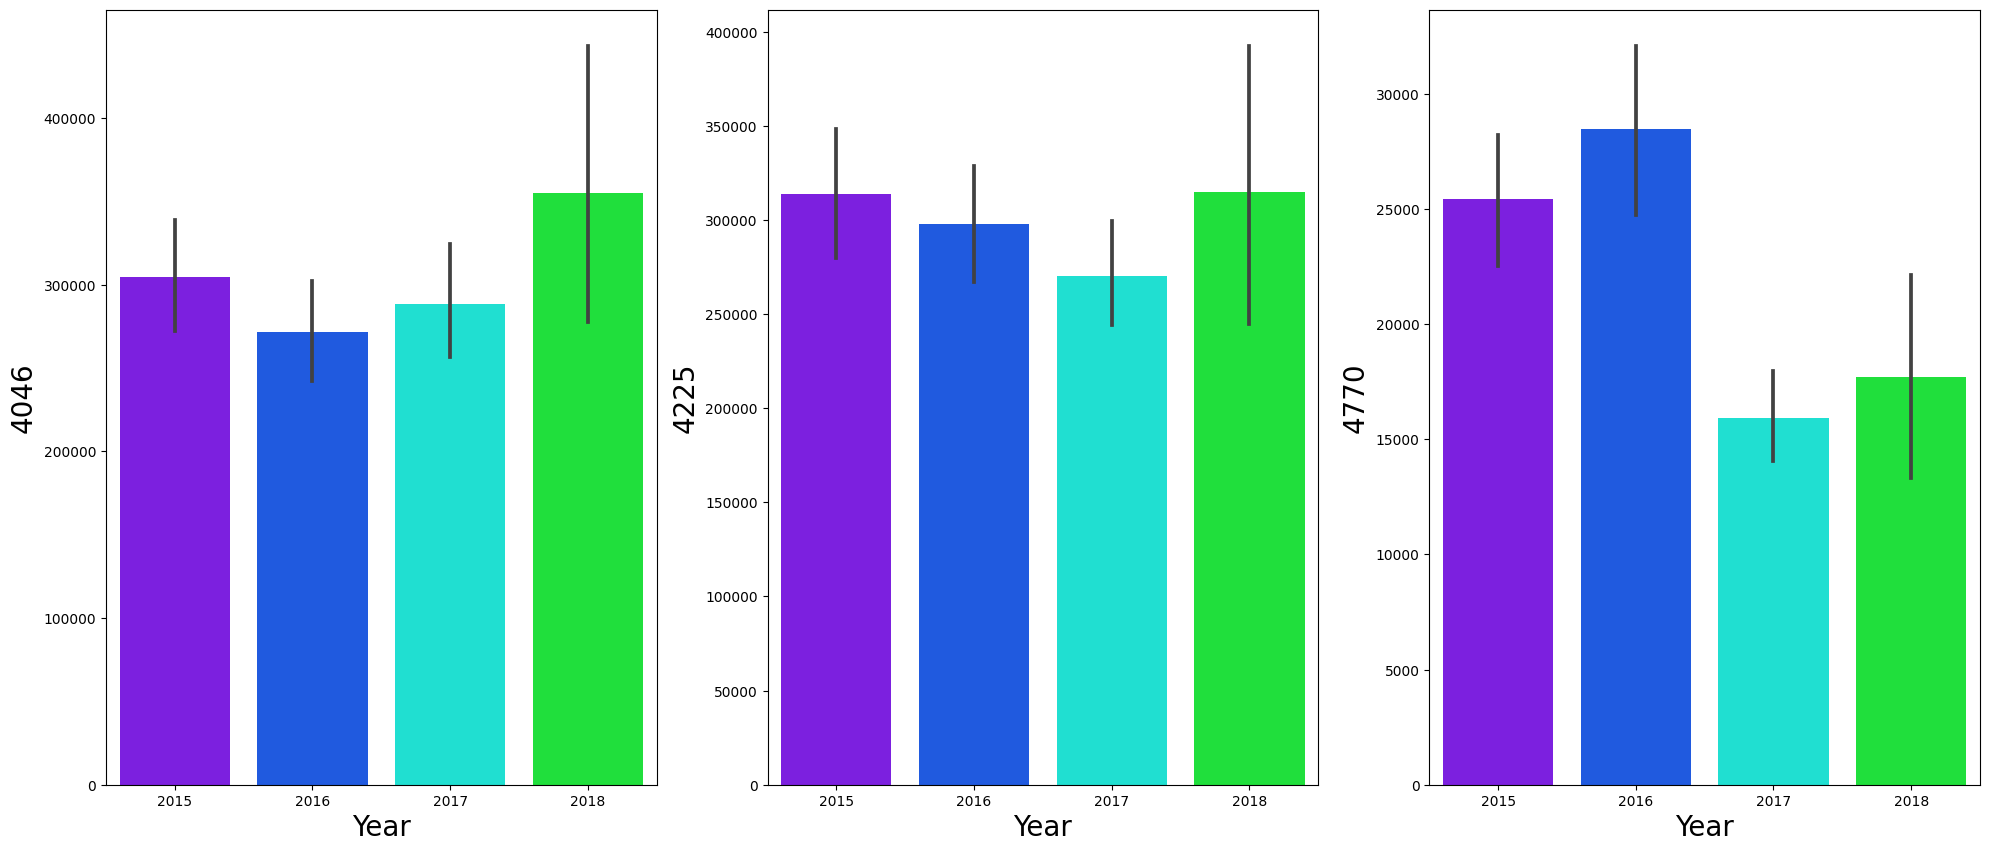

In [112]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['4046','4225','4770']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(x=X,y=y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and PLU 4770, which is least produced.

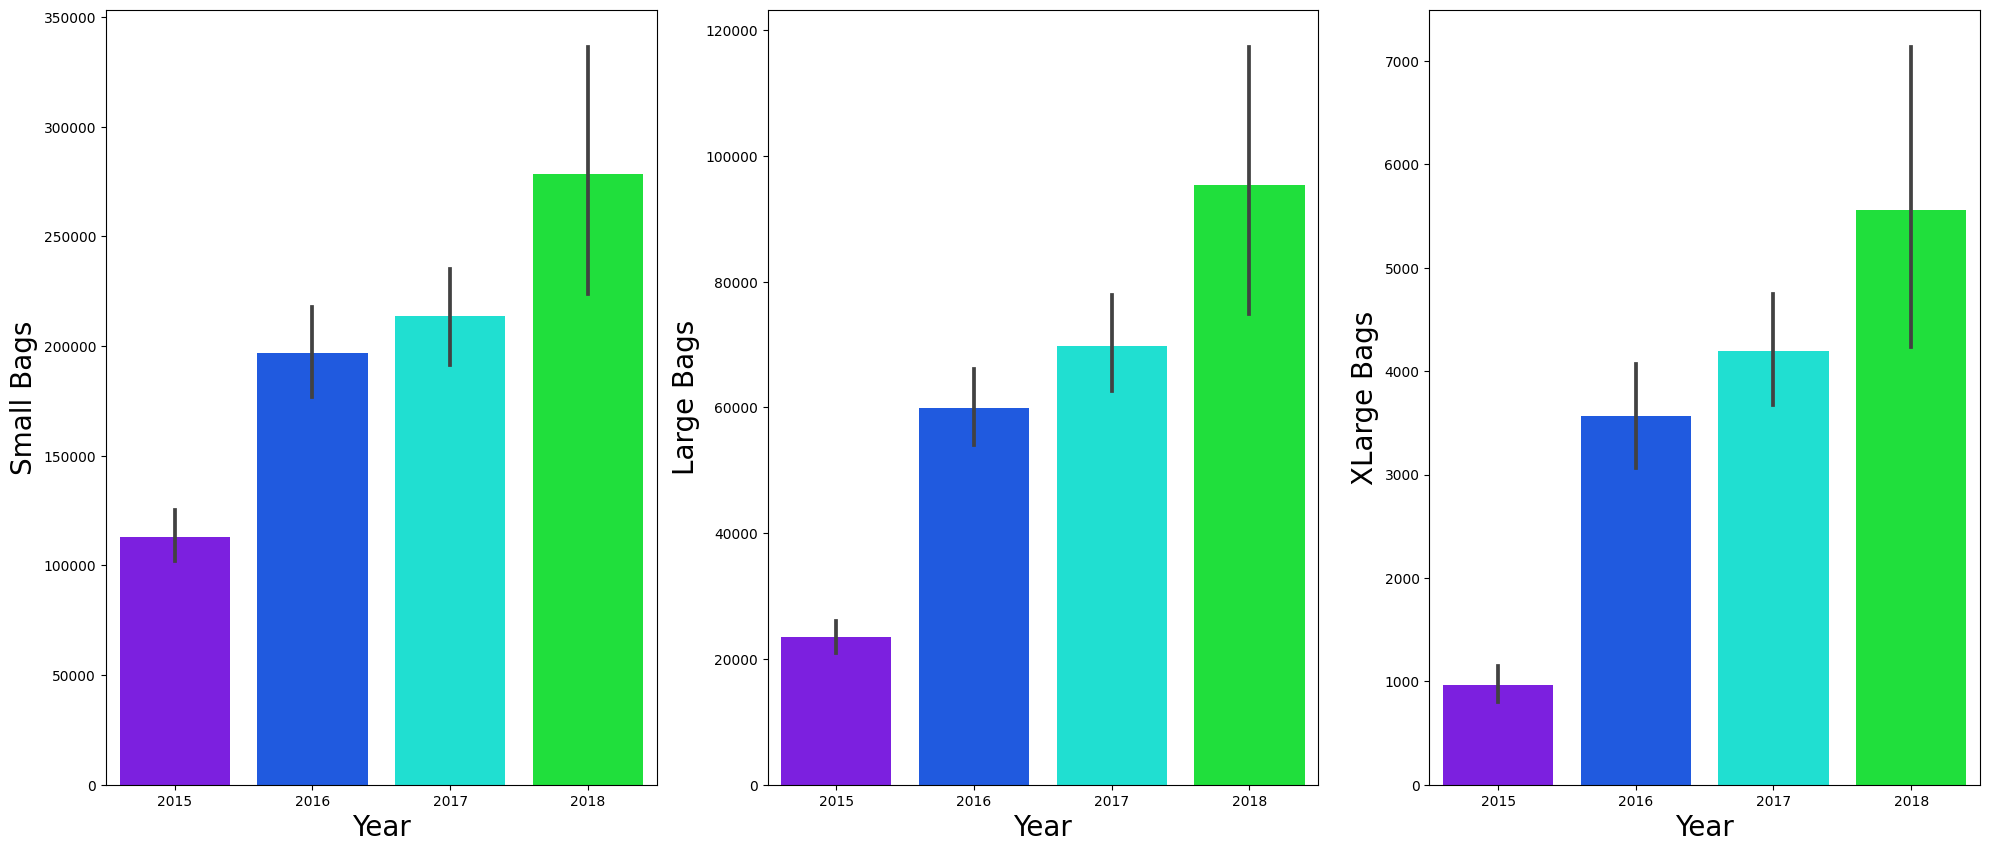

In [113]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(x=X,y=y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### observation:
- Sale of all 3 types of bags has grown over the years.
- Most of customers prefer buying Small Bags over Large and Xlarge bags.
- There is very narrow Customer segment willing to buy XLarge type bags possiblily more quantity need to consume and price associated with it.

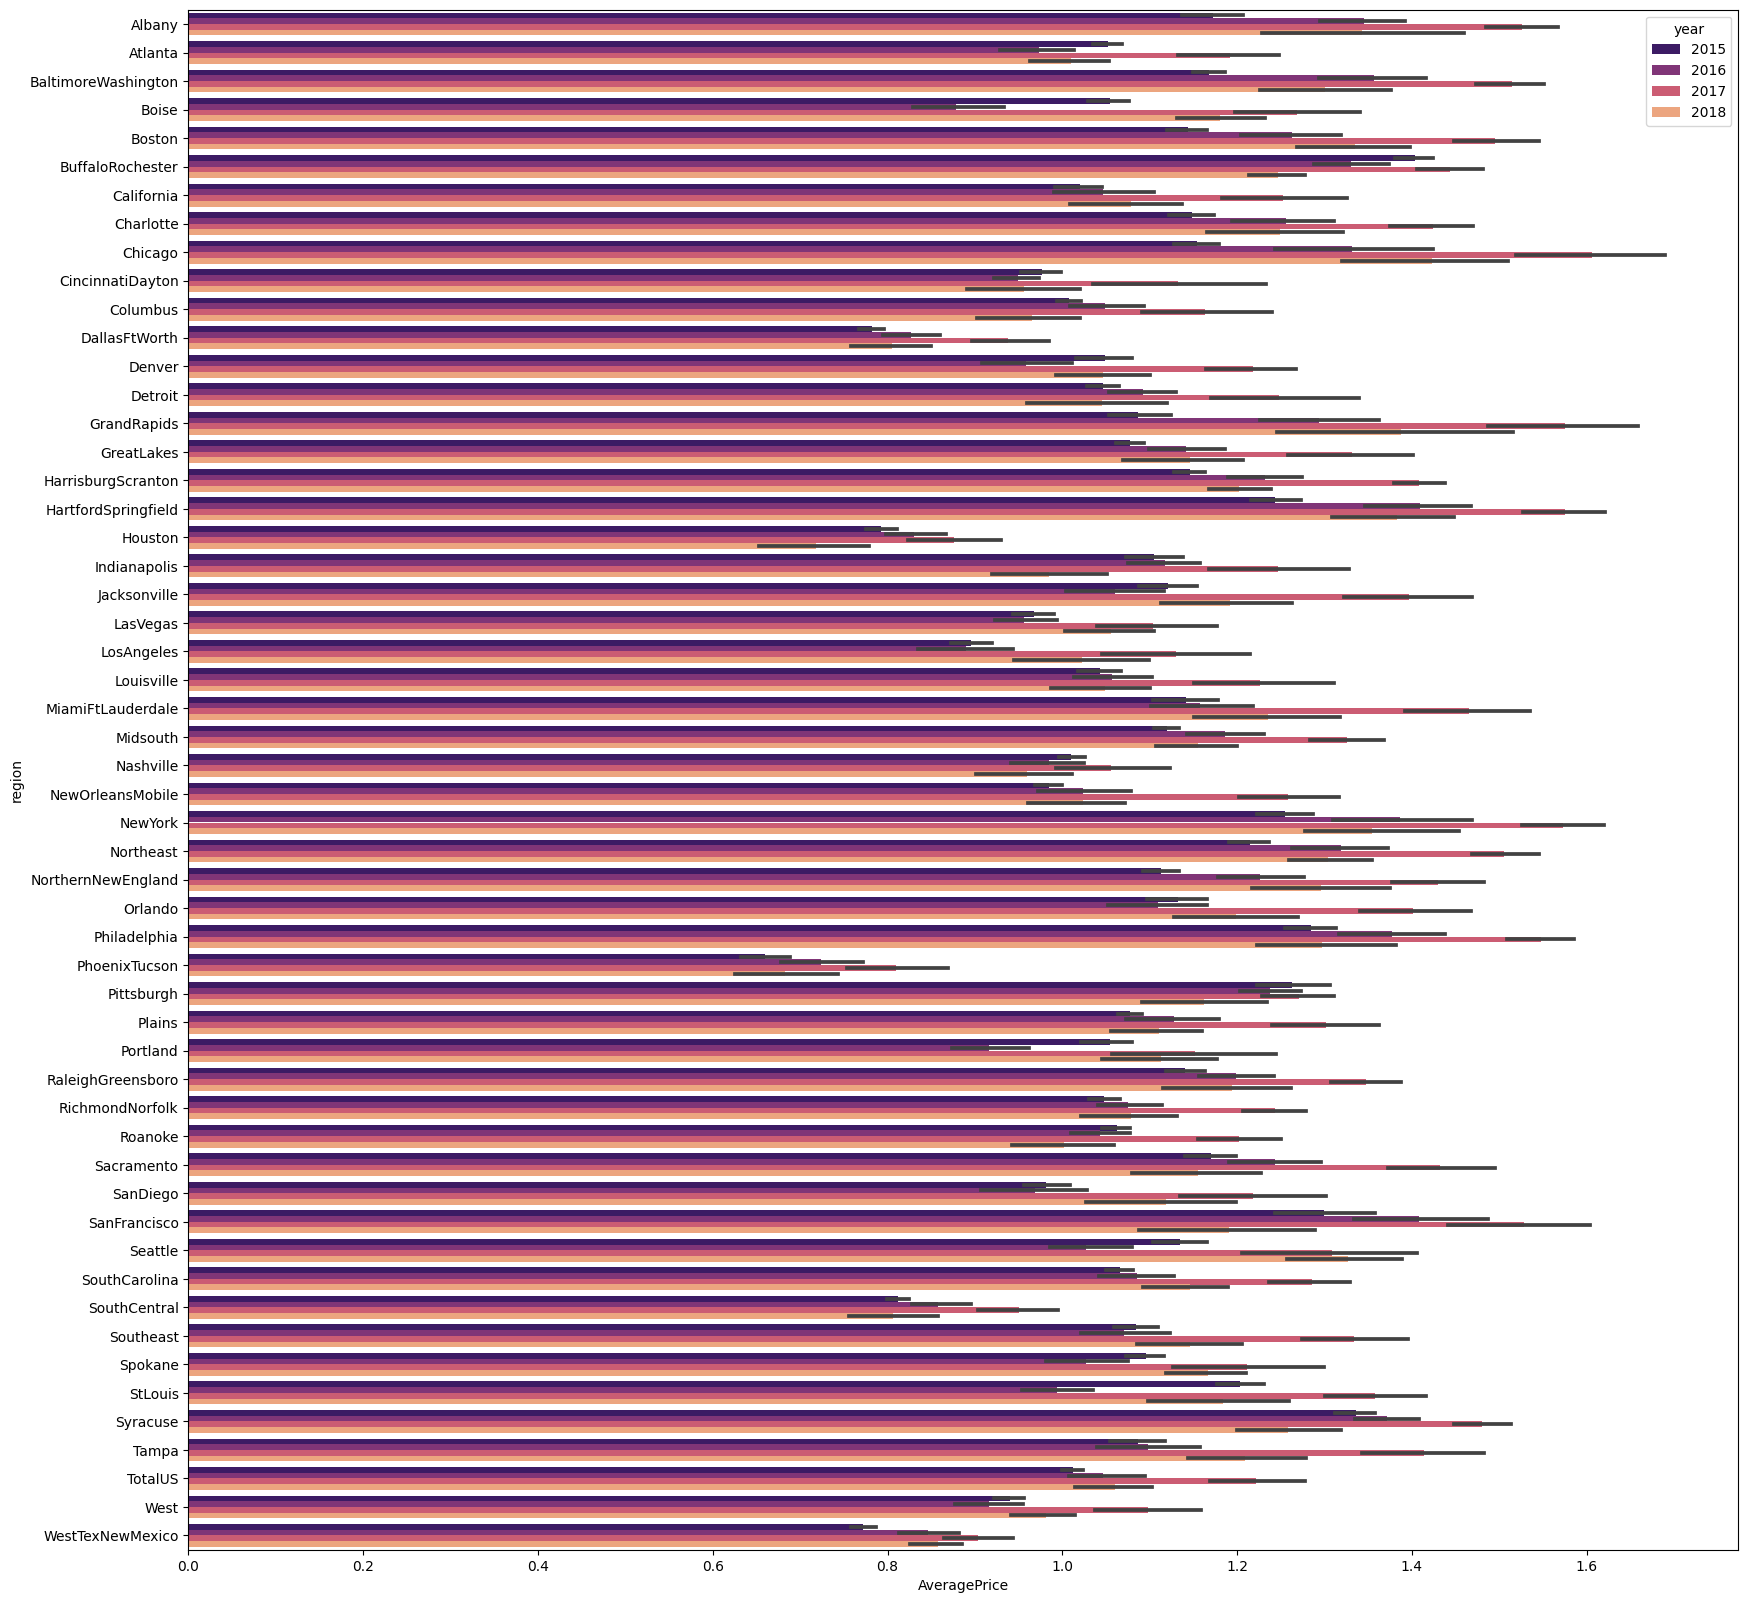

In [121]:
mask = df['type']=='conventional'
plt.figure(figsize=(20,20))
g = sns.barplot(x='AveragePrice',y='region',data=df[mask],
                   hue='year',
                   palette='magma',
              )
plt.show()

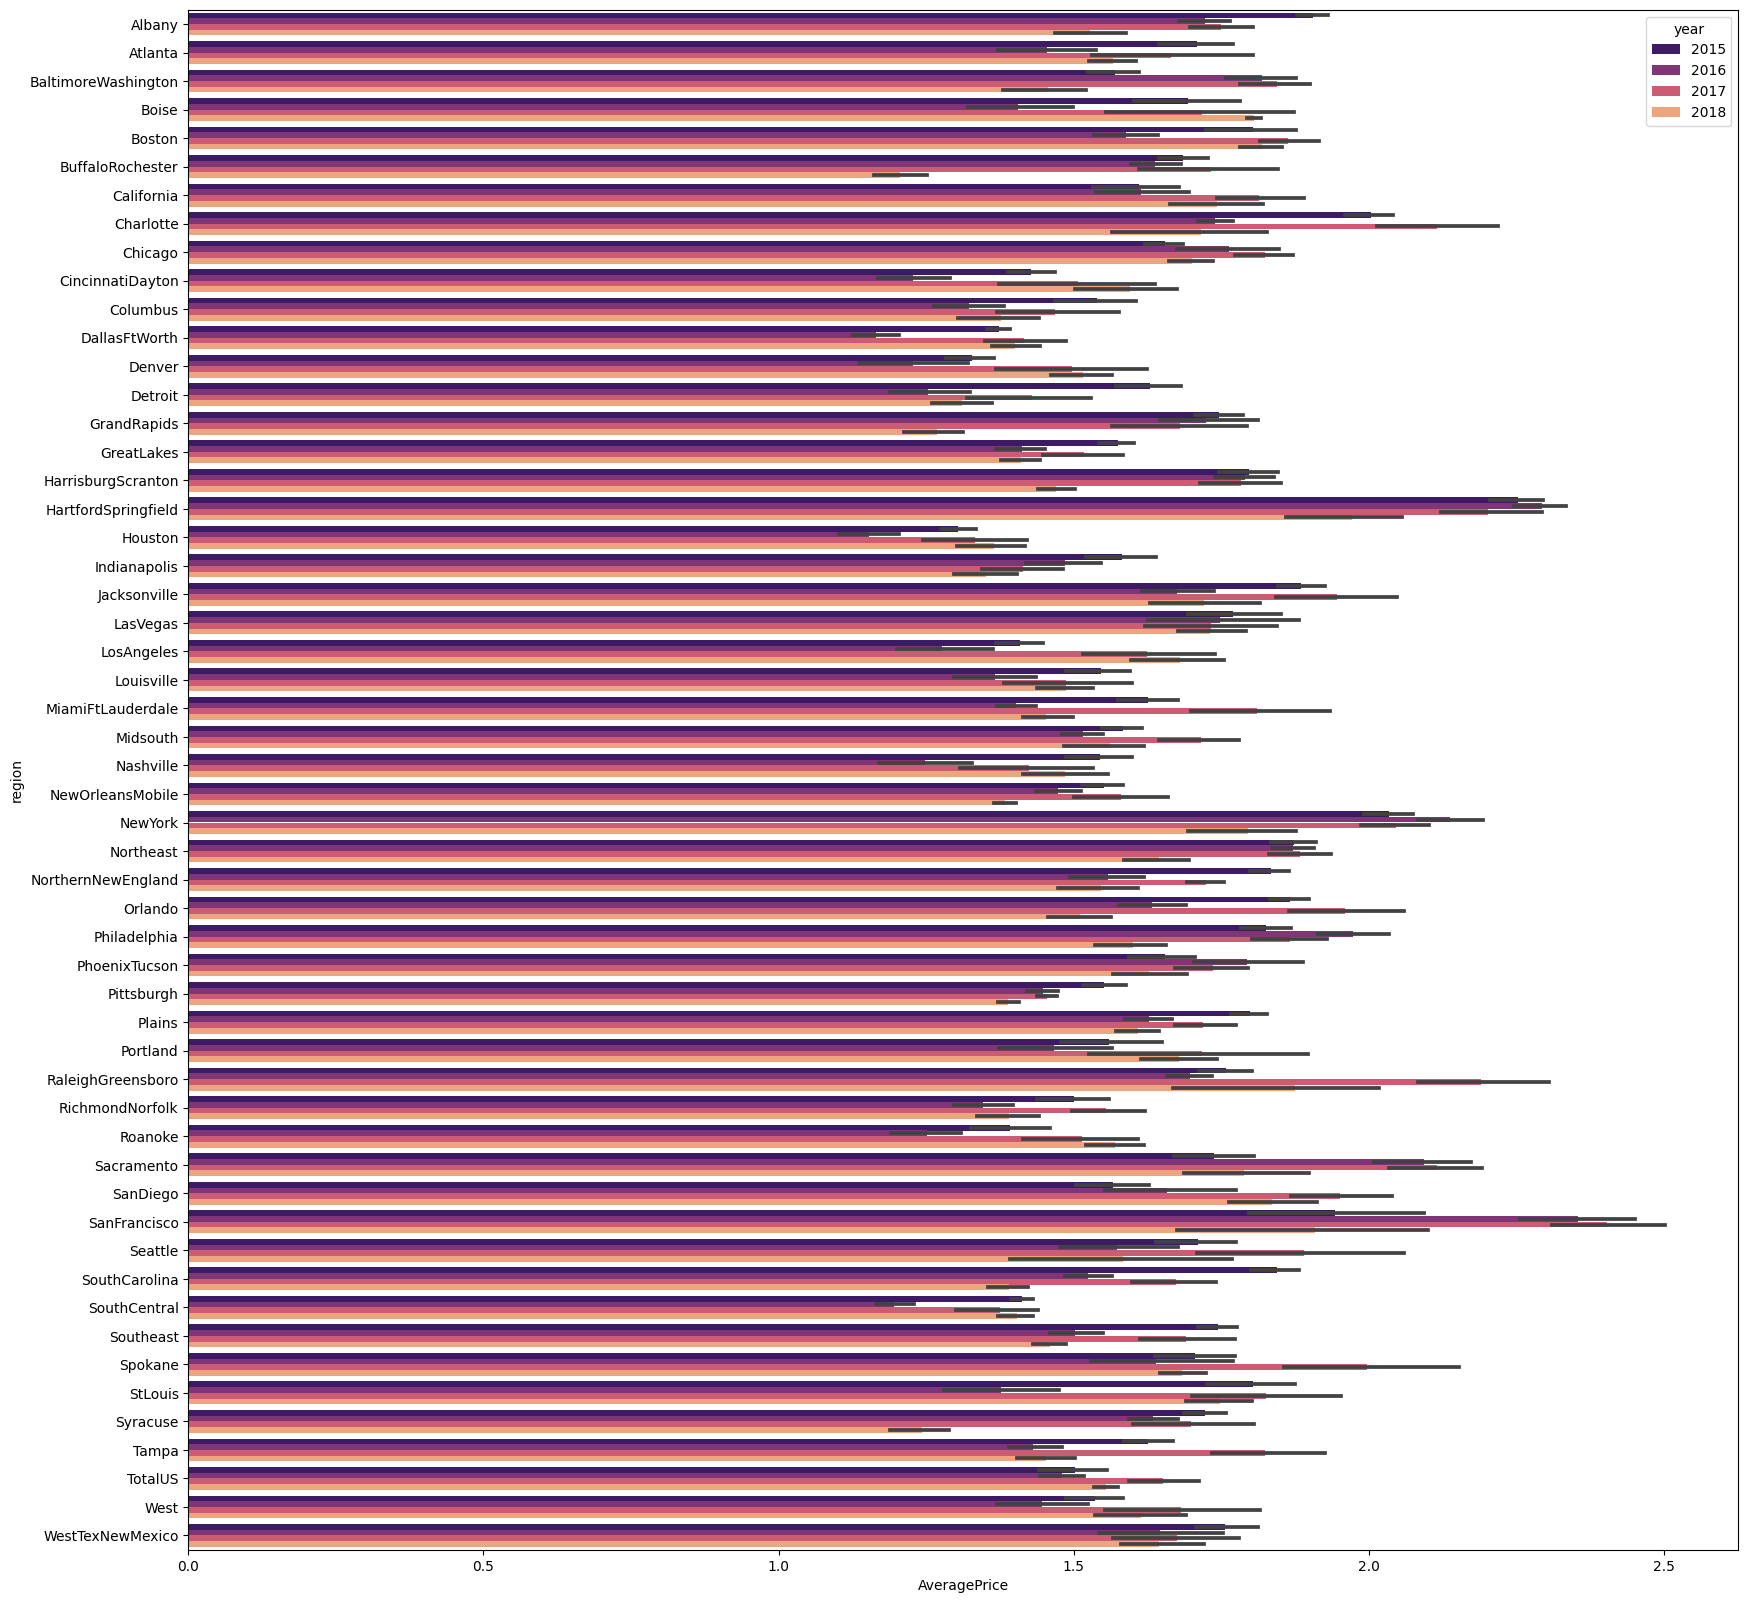

In [128]:
mask = df['type']=='organic'
plt.figure(figsize=(20,20))
g = sns.barplot(x='AveragePrice',y='region',data=df[mask],
                   hue='year',
                   palette='magma',
              )
plt.show()

- The Average price of the avacado is high in the region San Francisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high and price also high in the year 2017.

## Pairplot

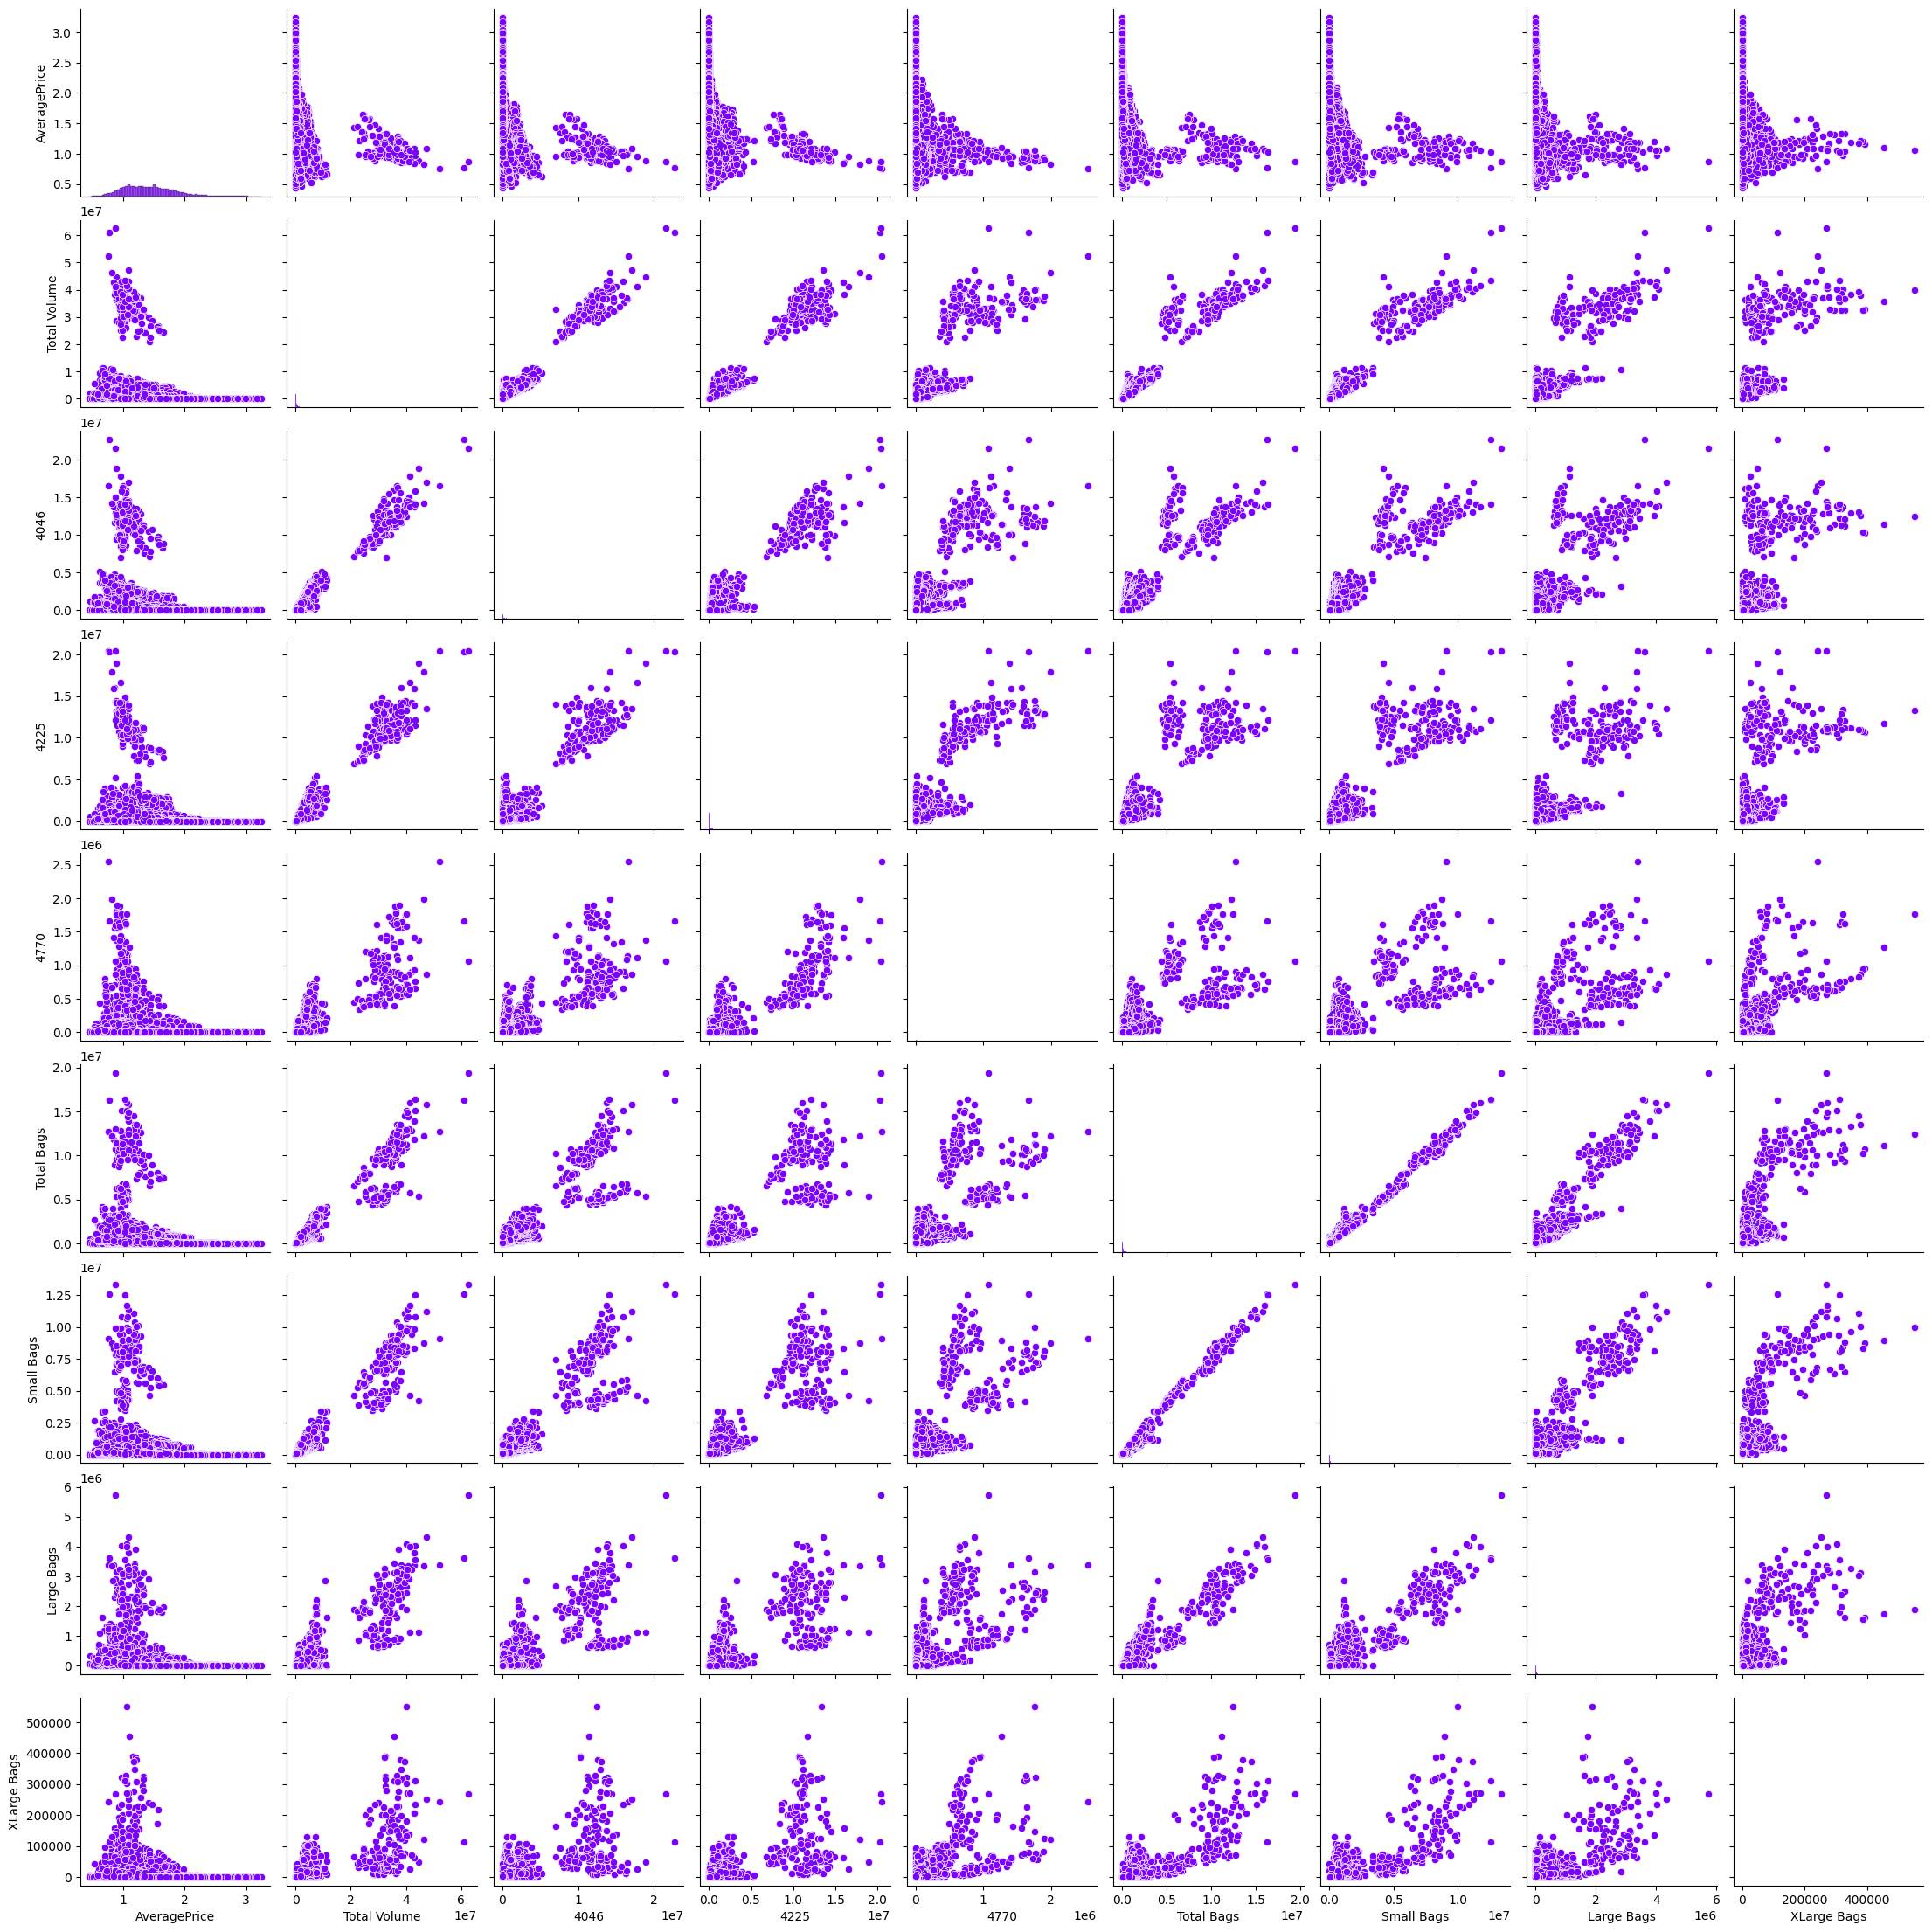

In [129]:
sns.pairplot(df2)

## Encoding categorical data

In [130]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Month  Year  
0     8603.62       93.25          0.0     0       0     12  2015  
1     9408.07       97.49          0.0     0       0     12  2015  
2     8042.21      103.14          0.0     0       0     12  2015  
3     5677.40      133.76          0.0     0       0     12  2015  
4     5986.26      197.69          0.0     0       0     11  2015

## Outliers Detection and Removal

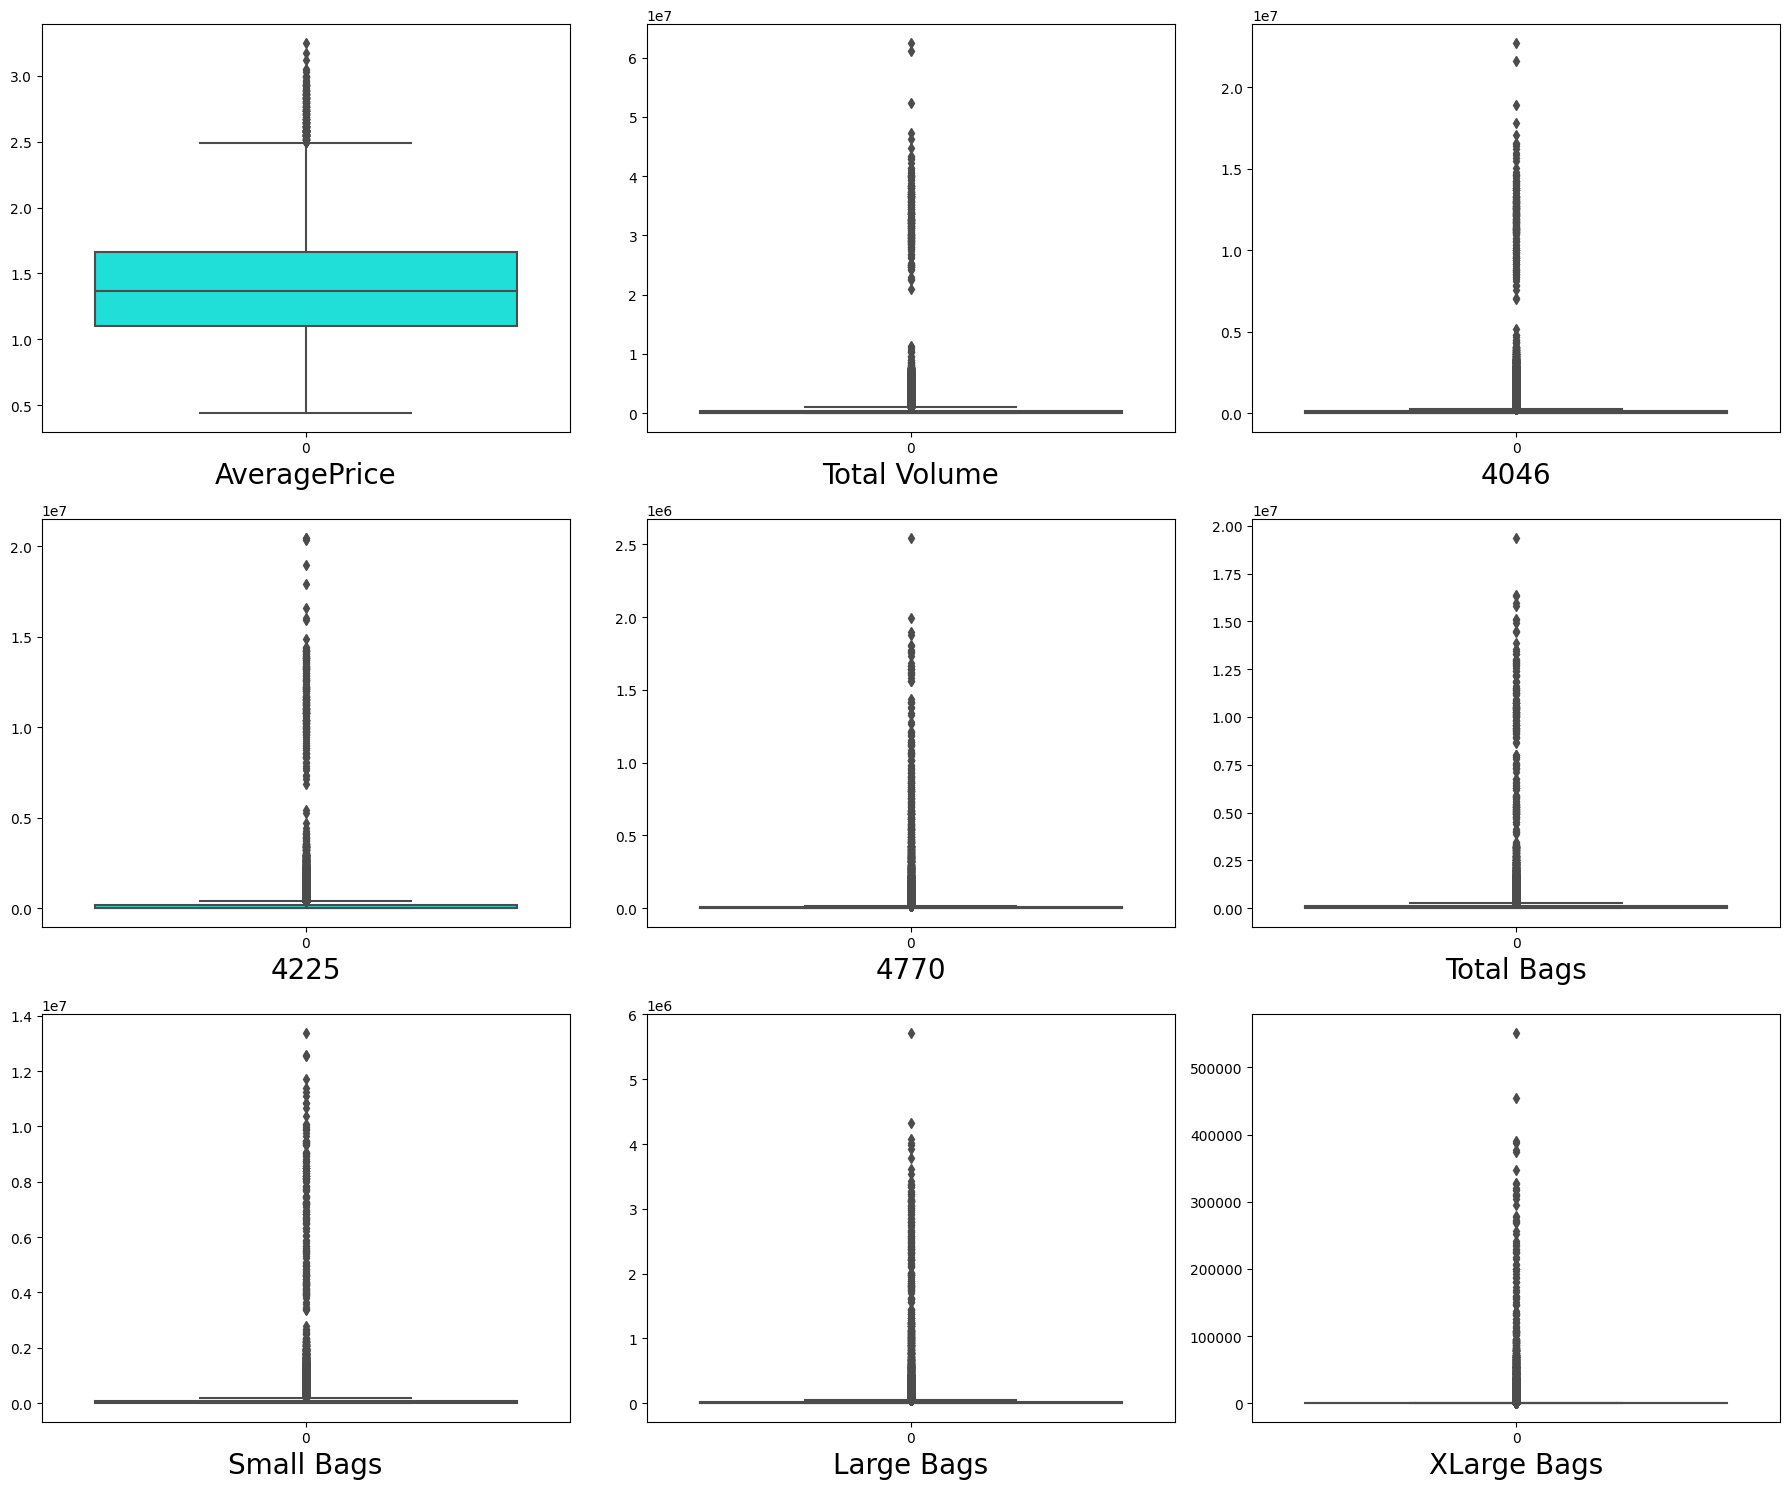

In [131]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [132]:
from scipy.stats import zscore
z = np.abs(zscore(df3))
threshold = 3
df4 = df3[(z<3).all(axis = 1)]

In [133]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df4.shape)

Shape of dataset after removing outliers : (17651, 13)


In [134]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((18249-17651)/18249)*100,'%')

Percentage Data Loss : 3.276891884486821 %


## Corrleation

In [136]:
df4.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.332056 -0.333577 -0.243988 -0.243465   
Total Volume     -0.332056      1.000000  0.876307  0.871592  0.647518   
4046             -0.333577      0.876307  1.000000  0.565118  0.492127   
4225             -0.243988      0.871592  0.565118  1.000000  0.620221   
4770             -0.243465      0.647518  0.492127  0.620221  1.000000   
Total Bags       -0.297323      0.912184  0.727981  0.757786  0.557980   
Small Bags       -0.275771      0.905648  0.706800  0.778761  0.571512   
Large Bags       -0.270915      0.640642  0.561060  0.451711  0.323747   
XLarge Bags      -0.152669      0.513741  0.415432  0.392030  0.495976   
type              0.613150     -0.415476 -0.341376 -0.383138 -0.321809   
region           -0.003242      0.076676  0.119067  0.011002 -0.095972   
Month             0.149502     -0.018645 -0.015797 -0.019844 -0.027245   
Year              0.091704     -0.004866 -0.034636 -0.040234 -0.082054   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.297323   -0.275771   -0.270915    -0.152669  0.613150   
Total Volume    0.912184    0.905648    0.640642     0.513741 -0.415476   
4046            0.727981    0.706800    0.561060     0.415432 -0.341376   
4225            0.757786    0.778761    0.451711     0.392030 -0.383138   
4770            0.557980    0.571512    0.323747     0.495976 -0.321809   
Total Bags      1.000000    0.978213    0.746946     0.581690 -0.378205   
Small Bags      0.978213    1.000000    0.593155     0.597700 -0.367593   
Large Bags      0.746946    0.593155    1.000000     0.296864 -0.286813   
XLarge Bags     0.581690    0.597700    0.296864     1.000000 -0.263734   
type           -0.378205   -0.367593   -0.286813    -0.263734  1.000000   
region          0.085892    0.065976    0.127635    -0.044338  0.018409   
Month          -0.010916   -0.013018   -0.001457     0.002843 -0.009499   
Year            0.103442    0.086639    0.119543     0.108209  0.003867   

                region     Month      Year  
AveragePrice -0.003242  0.149502  0.091704  
Total Volume  0.076676 -0.018645 -0.004866  
4046          0.119067 -0.015797 -0.034636  
4225          0.011002 -0.019844 -0.040234  
4770         -0.095972 -0.027245 -0.082054  
Total Bags    0.085892 -0.010916  0.103442  
Small Bags    0.065976 -0.013018  0.086639  
Large Bags    0.127635 -0.001457  0.119543  
XLarge Bags  -0.044338  0.002843  0.108209  
type          0.018409 -0.009499  0.003867  
region        1.000000  0.000119 -0.004417  
Month         0.000119  1.000000 -0.175287  
Year         -0.004417 -0.175287  1.000000

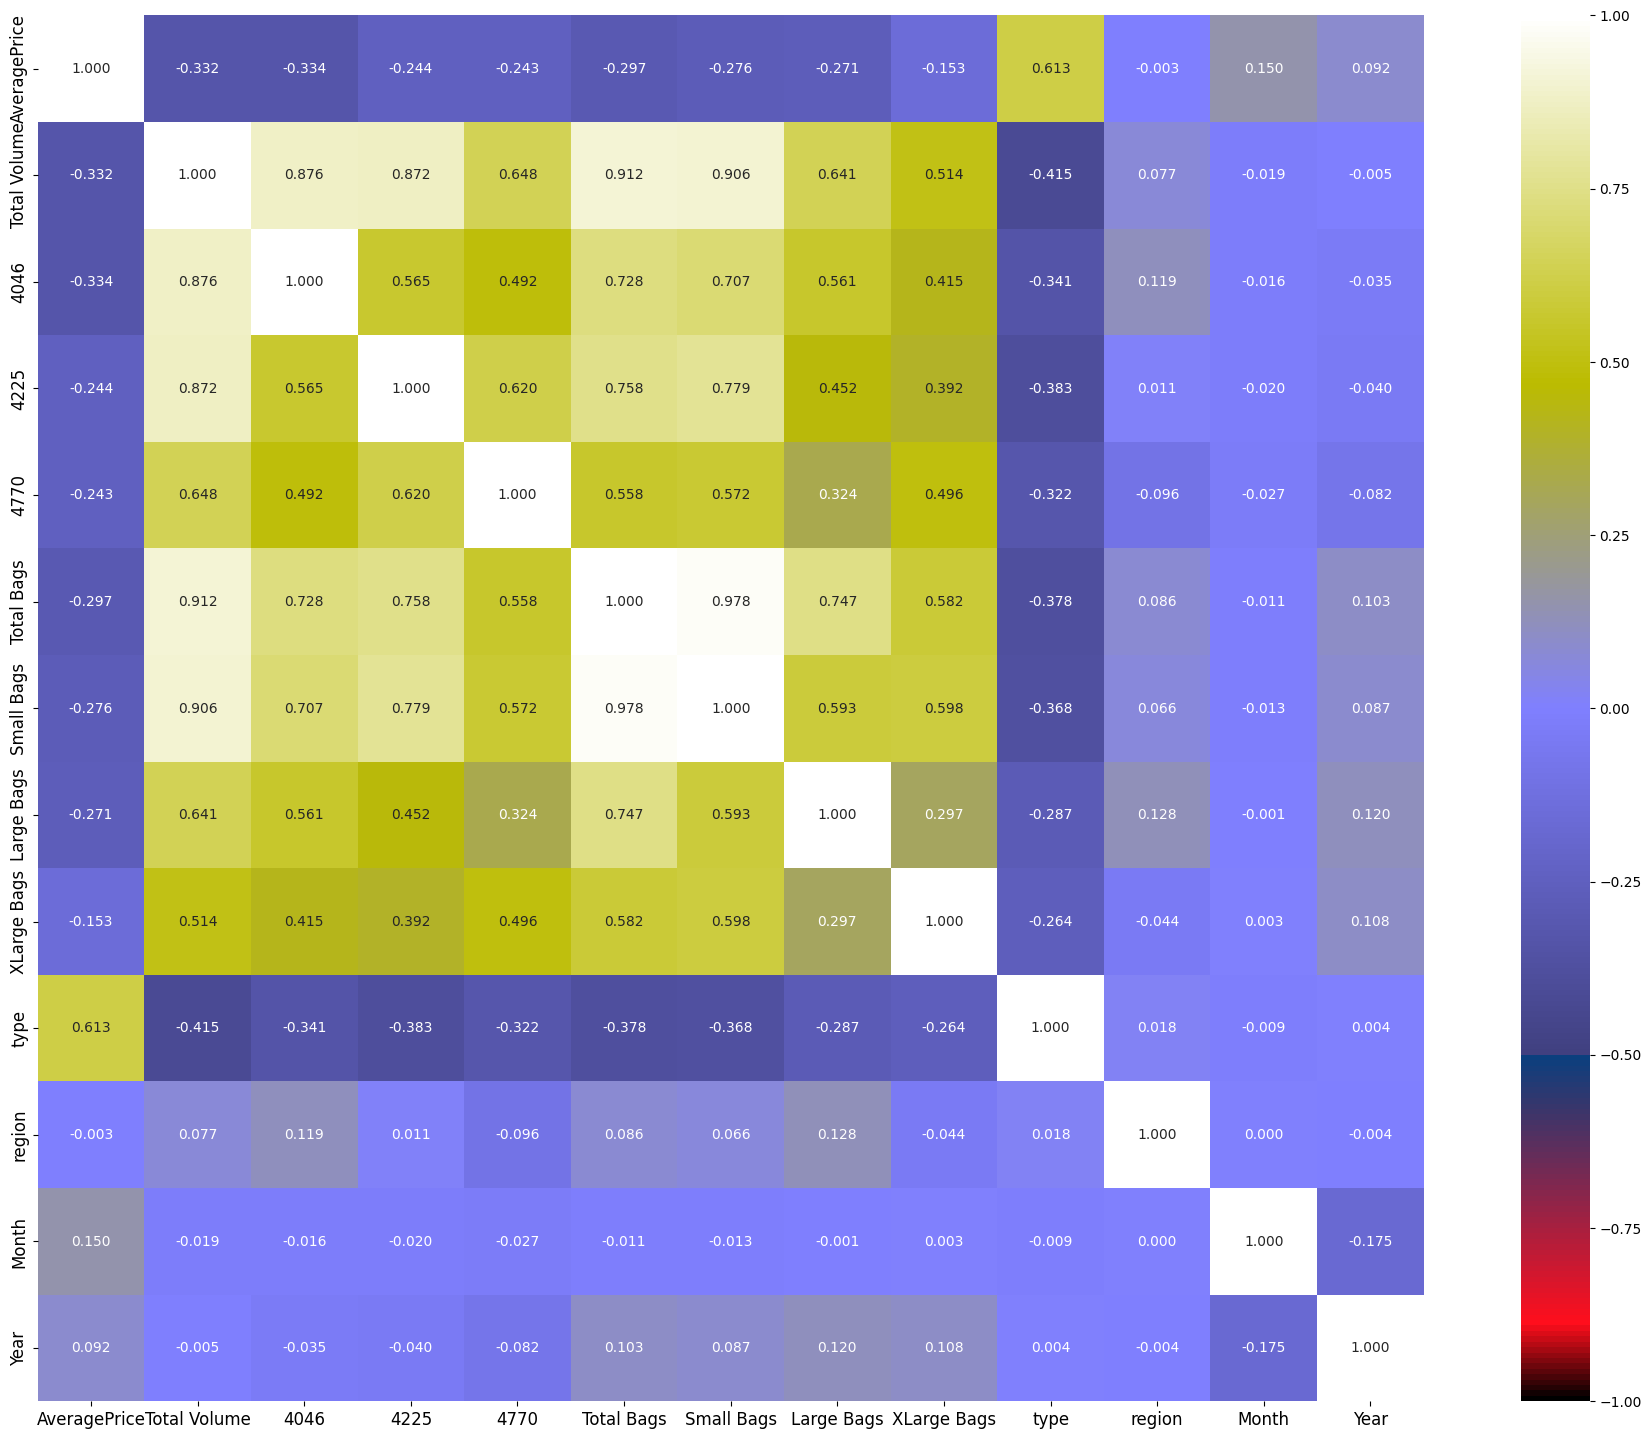

In [137]:
plt.figure(figsize=(25,18))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

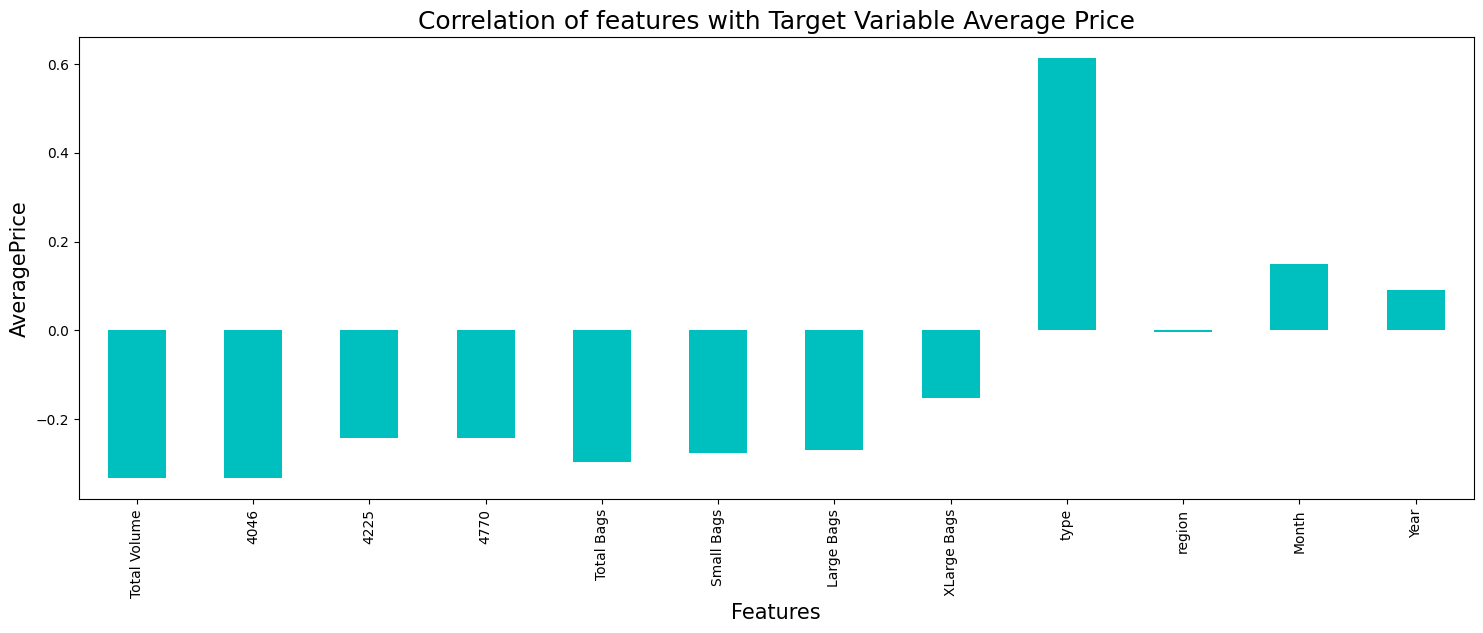

In [138]:
plt.figure(figsize = (18,6))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

In [139]:
df4.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Month  Year  
0     8603.62       93.25          0.0     0       0     12  2015  
1     9408.07       97.49          0.0     0       0     12  2015  
2     8042.21      103.14          0.0     0       0     12  2015  
3     5677.40      133.76          0.0     0       0     12  2015  
4     5986.26      197.69          0.0     0       0     11  2015

##### Almost all features are highly negatively correlated with the target variable and only type,year,month have positive correlation with the target.
- Small bags are highly correlated with Total Bags correlation coeffient 0.978. It is natural as most of bags are small.
- Total volume is highly correleated 4046.

#### observations:
##### We are going to remove some of columns which are not reqire for further analysis
- 4046,4225,4770 are shows multicollinearity with Total Volume. These feature are nothing but Total avacado sold under particular grade, which are already counted in Total Volume. As we do not have any price data according each grade of avacado. These feature doesnot have any meaning in ML model.So gone drop them.
- Same goes with Total bags. Total bags is sum of all other type of bags. We gone keep drop Total bags and going to keep other differnt size bags counts features.
- Next is region feature, we also going drop this as it very poorly correlated with other features.

In [140]:
df4.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

## Checking Multicollinearity between features using variance_inflation_factor

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features']= df4.columns
vif

VIF      Features
0  24.367038  AveragePrice
1   7.754106  Total Volume
2   7.707277    Small Bags
3   1.970395    Large Bags
4   1.693456   XLarge Bags
5   3.643636          type
6   4.212261         Month
7  19.857116          Year

#### Strategy to Address Multicollinearity :
1) Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2) Another way to address Multicollinerity is to Scaled Data and then apply PCA.

##### We will go by first way for further investigation. As For Independent feature VIF is within limit of 10 except year.

We will drop Year as it is less than 20% correlated with target feature and For most of input features correlated with less than 10%.

In [142]:
df4.drop(columns=['Year'],axis=1, inplace=True)

## Checking correlation with target variable after removal of multicollinearity##

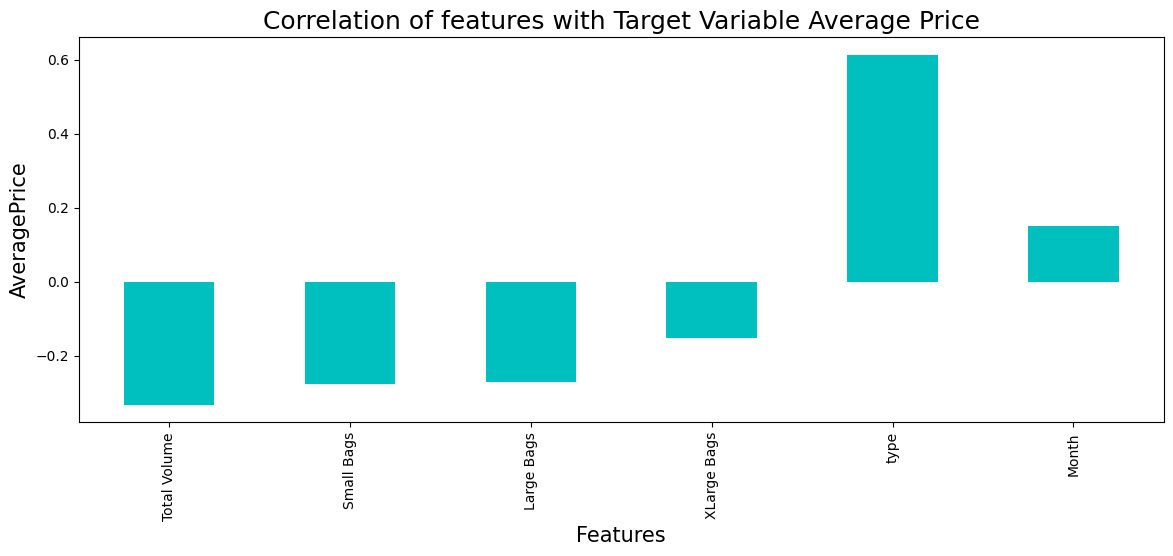

In [143]:
plt.figure(figsize = (14,5))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

## Skewness of the feature

In [144]:
df4.skew()

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
Month           0.107408
dtype: float64

### Transforming skewness through log transform

In [145]:
for col in df4.columns:
    if df4.skew().loc[col]>0.55:
        df4[col]=np.log1p(df4[col])

In [146]:
df4.skew()

AveragePrice    0.377432
Total Volume   -0.049950
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
Month           0.107408
dtype: float64

## Standard Scaling

In [147]:
X = df4.drop('AveragePrice', axis=1)
Y = df4['AveragePrice']

In [148]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (11826, 6)
Training target vector size: (11826,)
Test feature matrix size: (5825, 6)
Test target vector size: (5825,)


## Lets find the best random state

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.4699561577500033 on Random_state 557


## Linear Regression : Base model

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Price:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Price:'+'\033[0m\n',Y_test)

Predicted Price:
 [1.0918524  1.234798   1.60179338 ... 1.70481371 1.6431685  1.6354547 ]


Actual Price:
 8841     1.35
859      1.19
17369    2.09
11190    1.05
14051    2.03
         ... 
5452     1.05
3489     1.35
14534    1.22
11925    1.71
11077    1.83
Name: AveragePrice, Length: 5825, dtype: float64


## Linear Regression Evaluation Matrix

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.22390630602712788
Mean squared error : 0.08082880539614366
Root Mean Squared Error: 0.2843040720709847


 R2 Score :
0.4699561577500033


In [157]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -0.013708960907187184


## Applying other Regression Model, Evaluation & Crossvalidation

In [158]:
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.16163199118545638
Mean squared error : 0.04804761961242169
Root Mean Squared Error: 0.21919767246123234


 R2 Score :
0.6849224136677723


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.22390631596350793
Mean squared error : 0.08082881097903072
Root Mean Squared Error: 0.28430408188949857


 R2 Score :
0.4699561211396033


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.20951244635193134
Mean squared error : 0.0911203261802575
Root Mean Squared Error: 0.3018614353975305


 R2 Score :
0.4024683705400781


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.2201737002022776
Mean squared error : 0.07631059738848542
Root Mean Squared Error: 0.2762437282337563


 R2 Score :
0.49958480710002995


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.20405654322596245
Mean squared error : 0.08664660151688196
Root Mean Squared Error: 0.29

In [159]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : -0.19141364191922466


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : -0.013709058462106016


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.8458447641034912


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : -0.023895447702713346


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : -0.766849723277366


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_one

## Observation:
- Among all Model Random Forest Regressor gave us maximum R2 score of 0.6849 and minimum RMSE value of 0.2191. So We will perform Hyper Parameter Tuning on Random Forest Regressor.

# Hyper Parameter Tuning : GridSearchCV

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [169]:
parameter = {'n_estimators':[25,50,100,150],'max_depth': [3,6,9],
             'min_samples_leaf':[5,10],
             'max_features':[None,"sqrt","log2"]}

In [170]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [171]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=3)

In [174]:
GCV.best_params_

{'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 5,
 'n_estimators': 150}

# Final Model Building

In [175]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=150 , max_depth= 9, max_features = None,
             min_samples_leaf = 5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.1810360622691809
Mean squared error : 0.05529830795361425
Root Mean Squared Error: 0.2351559226420084


 R2 Score of Final Model :
0.6373752219396818




### Here after the Hyper parameter Tuning the R2 score of the model decreased Thus we will consider the Random Forest with default parameter as Final Model

In [178]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators = 70 ,max_depth=25)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.1607011057298595
Mean squared error : 0.04761765069704131
Root Mean Squared Error: 0.21821468946210132


 R2 Score of Final Model :
0.6877419824445137




In [181]:
#predictions
prediction = Final_mod.predict(X_test)
prediction


array([1.345     , 1.30258554, 2.00642857, ..., 1.34042857, 1.64653511,
       1.66883929])

In [183]:
a = np.array(Y_test)
df=pd.DataFrame()
df["predicted"] = prediction
df["original"] = a
df.sample(100)

predicted  original
471    1.866824      1.88
1559   1.169714      1.03
4830   1.327429      0.93
5511   1.678000      1.61
1815   0.977000      0.87
...         ...       ...
3949   2.025714      2.18
1048   1.631429      1.35
1605   1.604476      1.72
522    1.022714      0.90
875    1.107429      1.00

[100 rows x 2 columns]

# Saving the model

In [184]:
import joblib
joblib.dump(Final_mod,'Avacado_Final.pkl')

['Avacado_Final.pkl']